# 1 CORRIGE FECHA

In [1]:
import xarray as xr
import pandas as pd
import os
import glob

# Función para reasignar el tiempo basado en la hora del nombre del archivo
def corregir_fecha(ds, archivo):
    # Extrae la hora del nombre del archivo
    hora = os.path.basename(archivo).split('_')[3][:2]
    # Extrae el año y mes de la fecha original, pero ajusta el día a '01' y la hora a la obtenida del archivo
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Directorio de origen y destino
directorio_origen =  '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/'
directorio_destino = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/nuevosCalculos2/'

# Crea el directorio destino si no existe
os.makedirs(directorio_destino, exist_ok=True)

# Busca todos los archivos que coincidan con el patrón ERA5_*.nc
archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))

# Procesa cada archivo
for archivo in archivos:
    # Abre el dataset y corrige las fechas
    ds = corregir_fecha(xr.open_dataset(archivo), archivo)
    
    # Imprime los tres primeros valores del tiempo para mostrar los meses asignados
    tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
    print(f"Archivo: {archivo}, Primeros 3 meses asignados: {tres_primeros_meses}")
    
    # Genera el nombre del archivo de salida
    nombre_archivo = os.path.basename(archivo)
    archivo_salida = os.path.join(directorio_destino, nombre_archivo)
    
    # Guarda el dataset corregido en el nuevo directorio
    ds.to_netcdf(archivo_salida)
    print(f'Guardado: {archivo_salida}')


Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_t2m_MAM_09Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-03', '2000-04', '2000-05']
Guardado: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_t2m_MAM_09Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_ssr_JAS_03Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']
Guardado: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_ssr_JAS_03Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_t2m_MAM_15Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-03', '2000-04', '2000-05']
Guardado: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_t2m_MAM_15Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_e_JAS_06Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']
Guardado: /home/mandrade/DMARTINEZ/paper2_da

# 2 agrupa  por tiempo y genera variable

In [2]:
# ds=xr.open_dataset('/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_tp_JAS_03Z_2000_23AmP.nc')
# ds

Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_t2m_MAM_09Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-03', '2000-04', '2000-05']
Guardado: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_t2m_MAM_09Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_ssr_JAS_03Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']
Guardado: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_ssr_JAS_03Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_t2m_MAM_15Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-03', '2000-04', '2000-05']
Guardado: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_t2m_MAM_15Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_e_JAS_06Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']
Guardado: /home/mandrade/DMARTINEZ/paper2_da

/tmp/ipykernel_39900/1436440120.py:253: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()


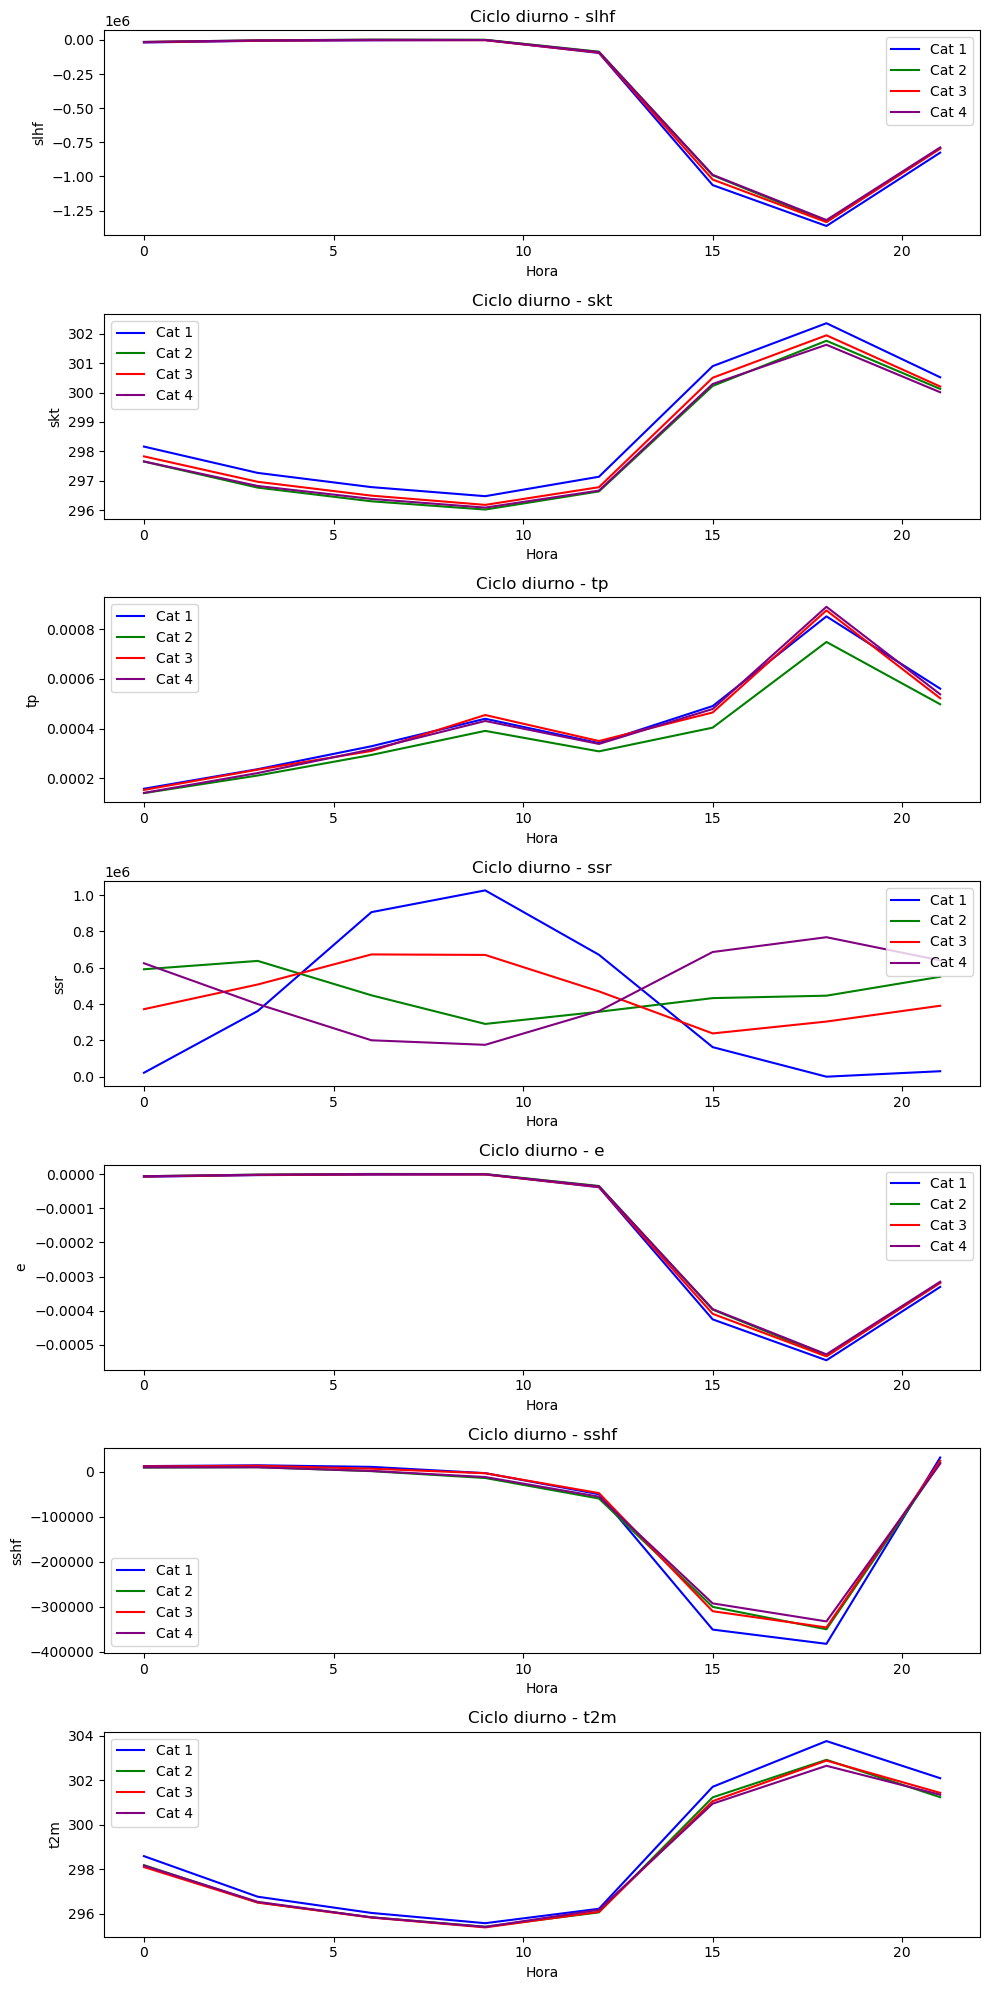

In [4]:
import xarray as xr
import pandas as pd
import os
import glob

# Función para reasignar el tiempo basado en la hora del nombre del archivo
def corregir_fecha(ds, archivo):
    # Extrae la hora del nombre del archivo
    hora = os.path.basename(archivo).split('_')[3][:2]
    # Extrae el año y mes de la fecha original, pero ajusta el día a '01' y la hora a la obtenida del archivo
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Directorio de origen y destino
directorio_origen = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/'
directorio_destino = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'

# Crea el directorio destino si no existe
os.makedirs(directorio_destino, exist_ok=True)

# Busca todos los archivos que coincidan con el patrón ERA5_*.nc
archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))

# Procesa cada archivo
for archivo in archivos:
    # Abre el dataset y corrige las fechas
    ds = corregir_fecha(xr.open_dataset(archivo), archivo)
    
    # Imprime los tres primeros valores del tiempo para mostrar los meses asignados
    tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
    print(f"Archivo: {archivo}, Primeros 3 meses asignados: {tres_primeros_meses}")
    
    # Genera el nombre del archivo de salida
    nombre_archivo = os.path.basename(archivo)
    archivo_salida = os.path.join(directorio_destino, nombre_archivo)
    
    # Guarda el dataset corregido en el nuevo directorio
    ds.to_netcdf(archivo_salida)
    print(f'Guardado: {archivo_salida}')


import xarray as xr
import pandas as pd
import glob
import os

# Variables y estaciones a analizar
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM']

#########################
for est in estaciones:
    for each in var:
        # Ruta de los archivos NetCDF
        ruta_archivos = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'
        # Corregir el patrón para usar 'each' en lugar de 'var'
        patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
        # Busca todos los archivos que coincidan con el patrón
        archivos_nc = glob.glob(patron)
        # Lista para almacenar los DataFrames
        dfs = []

        # Itera sobre los archivos encontrados
        for archivo in archivos_nc:
            # Abre el dataset y conviértelo en DataFrame
            ds = xr.open_dataset(archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

            # Agrega el DataFrame a la lista
            dfs.append(df)

        # Concatenar todos los DataFrames verticalmente
        df_combined = pd.concat(dfs, axis=0)

        # Ordenar el DataFrame combinado por la columna 'time'
        df_combined = df_combined.sort_values(by='time').reset_index(drop=True)

        # Muestra las primeras filas del DataFrame combinado
        print(df_combined.head())

        # Si deseas guardar el resultado en un archivo Excel
        output_path = f'/home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5_{each}_{est}.xlsx'
        df_combined.to_excel(output_path, index=False)
        print(f'DataFrame combinado guardado en {output_path}')
import pandas as pd
import glob

# Lista de archivos Excel
archivos = glob.glob('/home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5*.xlsx')

# Lista para almacenar los DataFrames
dfs = []

for archivo in archivos:
    # Extrae el nombre de la variable del archivo
    variable = archivo.split('/')[-1].split('_')[1]
    print(variable)
    # Lee el archivo Excel
    df = pd.read_excel(archivo)
    
    # Verifica si 'e' está en las columnas del DataFrame antes de renombrar
    if 'e' in df.columns:
        df = df.rename(columns={'e': variable})
    
    # Añade el DataFrame a la lista
    dfs.append(df)

# Combina todos los DataFrames en uno solo utilizando la columna de tiempo como referencia
df_concatenado = pd.concat(dfs, axis=1)

# Elimina las columnas duplicadas de tiempo
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]

# Extrae los meses y años únicos de la columna 'time'
meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()

# Imprime los meses únicos
print("Meses únicos presentes en la columna 'time':")
for mes in meses_unicos:
    print(mes)
nameConcat=estaciones[0]
    
df_concatenado.to_excel(f'/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_{nameConcat}.xlsx')

import xarray as xr
import pandas as pd
import glob
import os

# Variables y estaciones a analizar
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['JAS']

#########################
for est in estaciones:
    for each in var:
        # Ruta de los archivos NetCDF
        ruta_archivos = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'
        # Corregir el patrón para usar 'each' en lugar de 'var'
        patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
        # Busca todos los archivos que coincidan con el patrón
        archivos_nc = glob.glob(patron)
        # Lista para almacenar los DataFrames
        dfs = []

        # Itera sobre los archivos encontrados
        for archivo in archivos_nc:
            # Abre el dataset y conviértelo en DataFrame
            ds = xr.open_dataset(archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

            # Agrega el DataFrame a la lista
            dfs.append(df)

        # Concatenar todos los DataFrames verticalmente
        df_combined = pd.concat(dfs, axis=0)

        # Ordenar el DataFrame combinado por la columna 'time'
        df_combined = df_combined.sort_values(by='time').reset_index(drop=True)

        # Muestra las primeras filas del DataFrame combinado
        print(df_combined.head())

        # Si deseas guardar el resultado en un archivo Excel
        output_path = f'/home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5_{each}_{est}.xlsx'
        df_combined.to_excel(output_path, index=False)
        print(f'DataFrame combinado guardado en {output_path}')
import pandas as pd
import glob

# Lista de archivos Excel
archivos = glob.glob('/home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5*.xlsx')

# Lista para almacenar los DataFrames
dfs = []

for archivo in archivos:
    # Extrae el nombre de la variable del archivo
    variable = archivo.split('/')[-1].split('_')[1]
    print(variable)
    # Lee el archivo Excel
    df = pd.read_excel(archivo)
    
    # Verifica si 'e' está en las columnas del DataFrame antes de renombrar
    if 'e' in df.columns:
        df = df.rename(columns={'e': variable})
    
    # Añade el DataFrame a la lista
    dfs.append(df)

# Combina todos los DataFrames en uno solo utilizando la columna de tiempo como referencia
df_concatenado = pd.concat(dfs, axis=1)

# Elimina las columnas duplicadas de tiempo
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]

# Extrae los meses y años únicos de la columna 'time'
meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()

# Imprime los meses únicos
print("Meses únicos presentes en la columna 'time':")
for mes in meses_unicos:
    print(mes)
nameConcat=estaciones[0]
    
df_concatenado.to_excel(f'/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_{nameConcat}.xlsx')

import pandas as pd

# Lee los dos archivos Excel
df1 = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_JAS.xlsx')
df2 = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_MAM.xlsx')

# Concatenar los DataFrames verticalmente (uno debajo del otro)
df_concatenado = pd.concat([df1, df2], ignore_index=True)

# Asegurarse de que la columna 'time' esté en formato datetime si no lo está
df_concatenado['time'] = pd.to_datetime(df_concatenado['time'])

# Ordenar el DataFrame concatenado por la columna 'time'
df_concatenado = df_concatenado.sort_values(by='time').reset_index(drop=True)

# Muestra las primeras filas del DataFrame concatenado y ordenado
df_concatenado=df_concatenado.iloc[:,1:]
print(df_concatenado.head(10))
df_concatenado.to_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/Compilado_paper2.xlsx')

df_categorizacion = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')

# Convertir las columnas 'time' a formato '%Y-%m' para hacer la categorización basada en año y mes
df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')

# Hacer un merge de los DataFrames basado en el año y mes
df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')

# Mostrar el resultado
df_merged.head(3000)

df_merged.to_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/dfCombinadoCategorizado.xlsx')

# Cargar el archivo Excel combinado que el usuario acaba de subir
df_combinado_categorizado = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/dfCombinadoCategorizado.xlsx')

# Convertir la columna 'time' a formato datetime para poder extraer las horas
df_combinado_categorizado['time'] = pd.to_datetime(df_combinado_categorizado['time'])

# Extraer la hora de la columna 'time'
df_combinado_categorizado['hour'] = df_combinado_categorizado['time'].dt.hour

# Agrupar por 'cat' y 'hour' y calcular el promedio de las demás columnas
df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()

# Mostrar el resultado
df_promedios

# Eliminar las columnas sin sentido 'Unnamed: 0' y 'year_month'
df_promedios_ciclo_diurno = df_promedios.drop(columns=['Unnamed: 0', 'year_month'])
df_promedios_ciclo_diurno


df_promedios_ciclo_diurno.to_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/cicloDiurno.xlsx')

import matplotlib.pyplot as plt

# Asignar colores por categoría
colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}

# Variables a plotear
variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']

# Crear subplots para cada variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))

# Iterar sobre las variables y plotear el ciclo diurno para cada categoría
for i, var in enumerate(variables):
    ax = axes[i]
    for cat in df_promedios_ciclo_diurno['cat'].unique():
        # Filtrar por categoría
        df_cat = df_promedios_ciclo_diurno[df_promedios_ciclo_diurno['cat'] == cat]
        # Plotear la variable para cada categoría
        ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
    
    # Ajustes del gráfico
    ax.set_title(f'Ciclo diurno - {var}')
    ax.set_xlabel('Hora')
    ax.set_ylabel(var)
    ax.legend()

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.savefig('/home/mandrade/variacionDiurna.png')
# Mostrar los gráficos
plt.show()

                 time         e
0 2000-03-01 00:00:00 -0.000008
1 2000-03-01 03:00:00 -0.000004
2 2000-03-01 06:00:00 -0.000002
3 2000-03-01 09:00:00 -0.000003
4 2000-03-01 12:00:00 -0.000033
DataFrame combinado guardado en /home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5_e_MAM.xlsx
                 time        tp
0 2000-03-01 00:00:00  0.000142
1 2000-03-01 03:00:00  0.000226
2 2000-03-01 06:00:00  0.000329
3 2000-03-01 09:00:00  0.000467
4 2000-03-01 12:00:00  0.000424
DataFrame combinado guardado en /home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5_tp_MAM.xlsx
                 time          slhf
0 2000-03-01 00:00:00 -19376.017185
1 2000-03-01 03:00:00 -10347.174637
2 2000-03-01 06:00:00  -6130.728649
3 2000-03-01 09:00:00  -7157.873665
4 2000-03-01 12:00:00 -82176.572546
DataFrame combinado guardado en /home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5_slhf_MAM.xlsx
                 time          sshf
0 2000-03-01 00:00:00  14696.813992
1 2000-03-01 03:00:00  16588.466254
2 2000-03

/tmp/ipykernel_39484/1448226148.py:92: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()


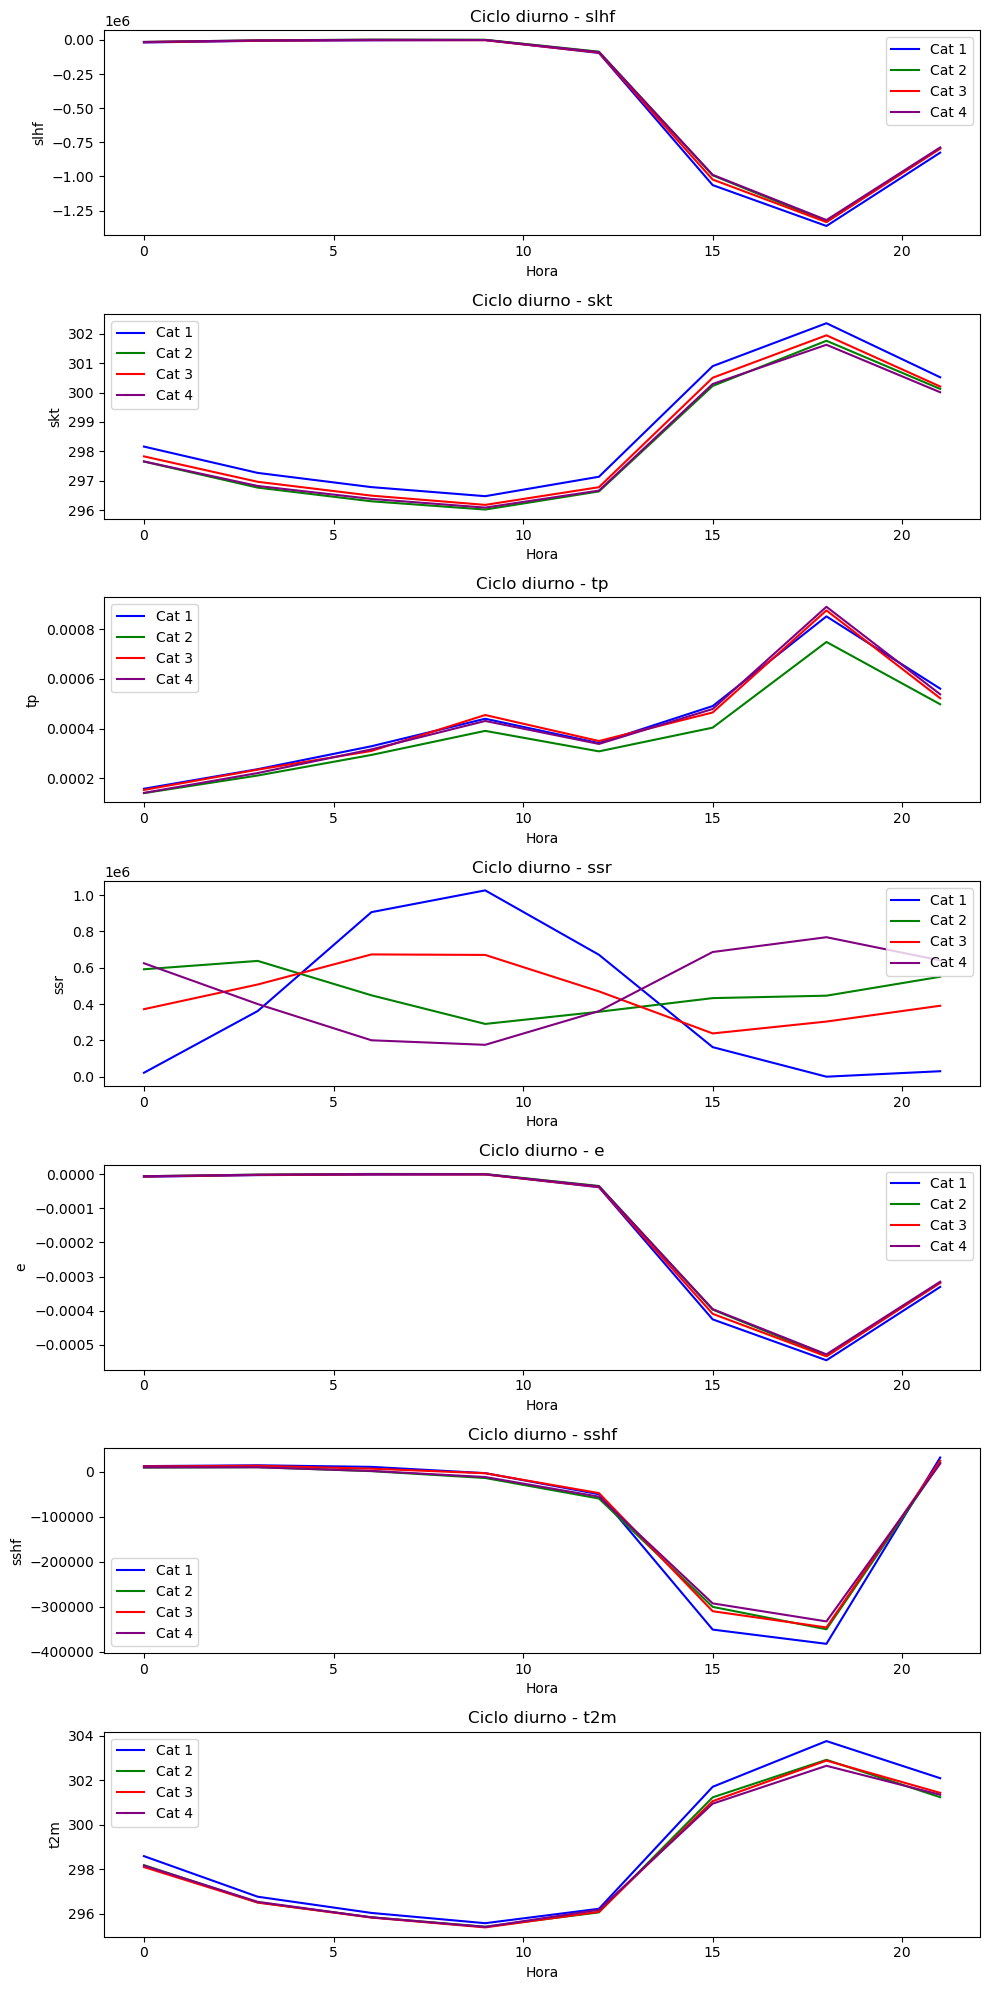

In [2]:
import xarray as xr
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Variables y estaciones a analizar
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM', 'JAS']

# Ruta de los archivos NetCDF
ruta_archivos = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'

# Función para procesar los archivos NetCDF y exportar a Excel
def procesar_archivos(var, estaciones):
    for est in estaciones:
        for each in var:
            # Busca todos los archivos que coincidan con el patrón
            patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
            archivos_nc = glob.glob(patron)
            dfs = []

            # Itera sobre los archivos encontrados
            for archivo in archivos_nc:
                ds = xr.open_dataset(archivo)
                df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])
                dfs.append(df)

            # Concatenar y ordenar por 'time'
            df_combined = pd.concat(dfs, axis=0).sort_values(by='time').reset_index(drop=True)
            print(df_combined.head())

            # Guardar el resultado en Excel
            output_path = f'/home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5_{each}_{est}.xlsx'
            df_combined.to_excel(output_path, index=False)
            print(f'DataFrame combinado guardado en {output_path}')

# Procesar archivos
procesar_archivos(var, estaciones)

# Combinar todos los archivos Excel
def combinar_archivos_excel():
    archivos = glob.glob('/home/mandrade/DMARTINEZ/paper2_dataordenada/ERA5*.xlsx')
    dfs = []

    for archivo in archivos:
        variable = archivo.split('/')[-1].split('_')[1]
        df = pd.read_excel(archivo)
        if 'e' in df.columns:
            df = df.rename(columns={'e': variable})
        dfs.append(df)

    # Concatenar DataFrames y eliminar duplicados de tiempo
    df_concatenado = pd.concat(dfs, axis=1)
    df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]
    
    # Guardar el archivo combinado
    estaciones = ['MAM', 'JAS']
    nameConcat = estaciones[0]
    df_concatenado.to_excel(f'/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_{nameConcat}.xlsx')

# Combinar los archivos procesados
combinar_archivos_excel()

# Procesar y categorizar
def procesar_categorizacion():
    df1 = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_JAS.xlsx')
    df2 = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/Concatenado_ERA5_MAM.xlsx')
    df_concatenado = pd.concat([df1, df2], ignore_index=True)
    
    df_concatenado['time'] = pd.to_datetime(df_concatenado['time'])
    df_concatenado = df_concatenado.sort_values(by='time').reset_index(drop=True).iloc[:,1:]
    df_concatenado.to_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/Compilado_paper2.xlsx')

    # Categorizar por año y mes
    df_categorizacion = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')
    df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
    df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')
    
    df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')
    df_merged.to_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/dfCombinadoCategorizado.xlsx')

# Procesar y categorizar los archivos
procesar_categorizacion()

# Promedio por categoría y hora
def calcular_promedio_por_hora():
    df_combinado_categorizado = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/dfCombinadoCategorizado.xlsx')
    df_combinado_categorizado['time'] = pd.to_datetime(df_combinado_categorizado['time'])
    df_combinado_categorizado['hour'] = df_combinado_categorizado['time'].dt.hour
    
    df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()
    df_promedios = df_promedios.drop(columns=['Unnamed: 0', 'year_month'])
    
    df_promedios.to_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/cicloDiurno.xlsx')

# Calcular promedios por hora
calcular_promedio_por_hora()

# Gráficas del ciclo diurno por categoría
def graficar_ciclo_diurno():
    df_promedios_ciclo_diurno = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/cicloDiurno.xlsx')
    colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}
    variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))
    
    for i, var in enumerate(variables):
        ax = axes[i]
        for cat in df_promedios_ciclo_diurno['cat'].unique():
            df_cat = df_promedios_ciclo_diurno[df_promedios_ciclo_diurno['cat'] == cat]
            ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
        ax.set_title(f'Ciclo diurno - {var}')
        ax.set_xlabel('Hora')
        ax.set_ylabel(var)
        ax.legend()
    
    plt.tight_layout()
    plt.savefig('/home/mandrade/variacionDiurna.png')
    plt.show()

# Generar las gráficas
graficar_ciclo_diurno()


Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_t2m_MAM_09Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_ssr_JAS_03Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_t2m_MAM_15Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_e_JAS_06Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_t2m_JAS_15Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_e_JAS_12Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_sshf_MAM_12Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/ERA5_e_MAM_03Z_2000_23AmP.

/tmp/ipykernel_39484/674236548.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedios = df.groupby(['cat', 'hour']).mean().reset_index()


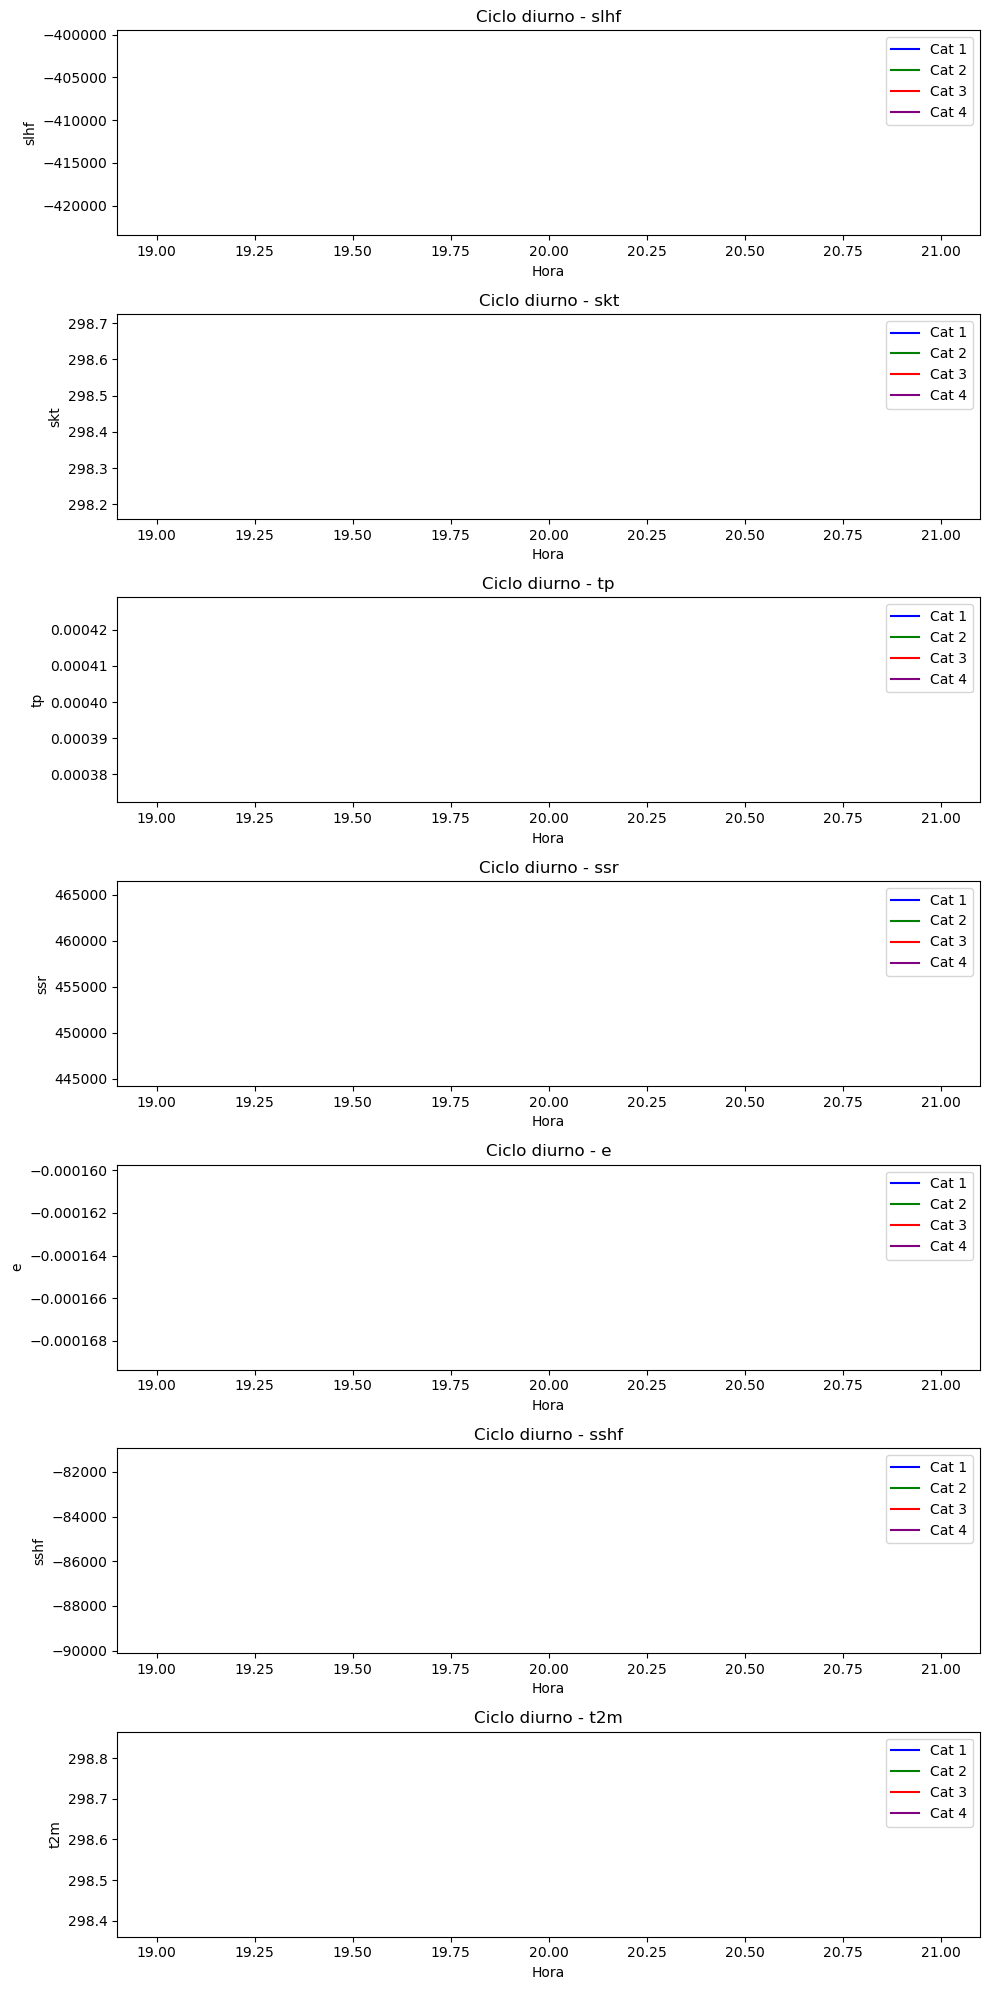

In [11]:
import xarray as xr
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

# Función para corregir las fechas basado en el nombre del archivo
def corregir_fecha(ds, archivo):
    hora = os.path.basename(archivo).split('_')[4][:2]  # Extraer la hora del nombre del archivo
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Función para procesar y guardar datasets corregidos
def procesar_archivos(directorio_origen, subdirectorio_destino, patron):
    # Construir el directorio de destino a partir del directorio de origen
    directorio_destino = os.path.join(directorio_origen, subdirectorio_destino)
    os.makedirs(directorio_destino, exist_ok=True)  # Crear el directorio si no existe
    archivos = glob.glob(os.path.join(directorio_origen, patron))  # Buscar los archivos

    for archivo in archivos:
        ds = xr.open_dataset(archivo)  # Abrir el dataset
        ds_corregido = corregir_fecha(ds, archivo)  # Corregir la fecha
        nombre_archivo = os.path.basename(archivo)
        archivo_salida = os.path.join(directorio_destino, nombre_archivo)  # Ruta de salida
        ds_corregido.to_netcdf(archivo_salida)  # Guardar el archivo corregido
        print(f'Archivo procesado y guardado: {archivo_salida}')

# Función para concatenar DataFrames a partir de archivos NetCDF procesados
def concatenar_datos(directorio_origen, subdirectorio_destino, variables, estaciones):
    ruta_archivos = os.path.join(directorio_origen, subdirectorio_destino)
    for est in estaciones:
        for var in variables:
            patron = os.path.join(ruta_archivos, f'ERA5_{var}_{est}_*.nc')
            archivos_nc = glob.glob(patron)
            dfs = [xr.open_dataset(archivo).to_dataframe().reset_index().drop(columns=['lon', 'lat']) for archivo in archivos_nc]
            df_combined = pd.concat(dfs).sort_values(by='time').reset_index(drop=True)

            # Guardar el DataFrame combinado en Excel
            output_path = os.path.join(directorio_origen, f'ERA5_{var}_{est}.xlsx')
            df_combined.to_excel(output_path, index=False)
            print(f'DataFrame combinado guardado en {output_path}')

# Función para combinar y categorizar datos en Excel
def categorizar_datos(directorio_origen):
    archivos_excel = glob.glob(os.path.join(directorio_origen, 'ERA5*.xlsx'))
    dfs = []
    for archivo in archivos_excel:
        variable = archivo.split('/')[-1].split('_')[1]
        df = pd.read_excel(archivo)
        if 'e' in df.columns:
            df = df.rename(columns={'e': variable})
        dfs.append(df)
    
    df_concatenado = pd.concat(dfs, axis=1).loc[:, ~pd.concat(dfs, axis=1).columns.duplicated()]
    df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
    
    df_categorizacion = pd.read_excel(os.path.join(directorio_origen, '/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx'))
    df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')

    # Hacer el merge
    df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')

    # Guardar el archivo combinado categorizado
    output_path = os.path.join(directorio_origen, 'dfCombinadoCategorizado.xlsx')
    df_merged.to_excel(output_path, index=False)
    print('Archivo categorizado guardado.')

# Plotear el ciclo diurno
def plotear_ciclo_diurno(directorio_origen):
    df = pd.read_excel(os.path.join(directorio_origen, 'dfCombinadoCategorizado.xlsx'))
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    df_promedios = df.groupby(['cat', 'hour']).mean().reset_index()
    
    colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}
    variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))
    
    for i, var in enumerate(variables):
        ax = axes[i]
        for cat in df_promedios['cat'].unique():
            df_cat = df_promedios[df_promedios['cat'] == cat]
            ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
        
        ax.set_title(f'Ciclo diurno - {var}')
        ax.set_xlabel('Hora')
        ax.set_ylabel(var)
        ax.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(directorio_origen, 'variacionDiurna.png'))
    plt.show()

# Directorio de origen (ruta relativa)
directorio_origen = '/home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1'

# Procesar los archivos NetCDF
procesar_archivos(directorio_origen, 'nuevosCalculos2', 'ERA5_*.nc')

# Variables y estaciones
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM', 'JAS']

# Concatenar y guardar los datos en Excel
concatenar_datos(directorio_origen, 'nuevosCalculos2', var, estaciones)

# Ejecutar la categorización de datos
categorizar_datos(directorio_origen)

# Ejecutar el ploteo del ciclo diurno
plotear_ciclo_diurno(directorio_origen)


In [9]:
import xarray as xr
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

# Función para corregir las fechas basado en el nombre del archivo
def corregir_fecha(ds, archivo):
    hora = os.path.basename(archivo).split('_')[4][:2]  # Extraer la hora del nombre del archivo
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Función para procesar y guardar datasets corregidos
def procesar_archivos(directorio_origen, subdirectorio_destino, patron):
    # Construir el directorio de destino a partir del directorio de origen
    directorio_destino = os.path.join(directorio_origen, subdirectorio_destino)
    os.makedirs(directorio_destino, exist_ok=True)  # Crear el directorio si no existe
    archivos = glob.glob(os.path.join(directorio_origen, patron))  # Buscar los archivos

    for archivo in archivos:
        ds = xr.open_dataset(archivo)  # Abrir el dataset
        ds_corregido = corregir_fecha(ds, archivo)  # Corregir la fecha
        nombre_archivo = os.path.basename(archivo)
        archivo_salida = os.path.join(directorio_destino, nombre_archivo)  # Ruta de salida
        ds_corregido.to_netcdf(archivo_salida)  # Guardar el archivo corregido
        print(f'Archivo procesado y guardado: {archivo_salida}')

# Función para concatenar DataFrames a partir de archivos NetCDF procesados
def concatenar_datos(directorio_origen, subdirectorio_destino, variables, estaciones):
    ruta_archivos = os.path.join(directorio_origen, subdirectorio_destino)
    for est in estaciones:
        for var in variables:
            patron = os.path.join(ruta_archivos, f'ERA5_{var}_{est}_*.nc')
            archivos_nc = glob.glob(patron)
            dfs = [xr.open_dataset(archivo).to_dataframe().reset_index().drop(columns=['lon', 'lat']) for archivo in archivos_nc]
            df_combined = pd.concat(dfs).sort_values(by='time').reset_index(drop=True)

            # Guardar el DataFrame combinado en Excel
            output_path = os.path.join(directorio_origen, f'ERA5_{var}_{est}.xlsx')
            df_combined.to_excel(output_path, index=False)
            print(f'DataFrame combinado guardado en {output_path}')

# Función para combinar y categorizar datos en Excel
def categorizar_datos(directorio_origen):
    archivos_excel = glob.glob(os.path.join(directorio_origen, 'ERA5*.xlsx'))
    dfs = []
    for archivo in archivos_excel:
        variable = archivo.split('/')[-1].split('_')[1]
        df = pd.read_excel(archivo)
        if 'e' in df.columns:
            df = df.rename(columns={'e': variable})
        dfs.append(df)
    
    df_concatenado = pd.concat(dfs, axis=1).loc[:, ~pd.concat(dfs, axis=1).columns.duplicated()]
    df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
    
    df_categorizacion = pd.read_excel(os.path.join(directorio_origen, '/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx'))
    df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')

    # Hacer el merge
    df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')

    # Guardar el archivo combinado categorizado
    output_path = os.path.join(directorio_origen, 'dfCombinadoCategorizado.xlsx')
    df_merged.to_excel(output_path, index=False)
    print('Archivo categorizado guardado.')

# Plotear el ciclo diurno
def plotear_ciclo_diurno(directorio_origen):
    df = pd.read_excel(os.path.join(directorio_origen, 'dfCombinadoCategorizado.xlsx'))
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    df_promedios = df.groupby(['cat', 'hour']).mean().reset_index()
    
    colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}
    variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))
    
    for i, var in enumerate(variables):
        ax = axes[i]
        for cat in df_promedios['cat'].unique():
            df_cat = df_promedios[df_promedios['cat'] == cat]
            ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
        
        ax.set_title(f'Ciclo diurno - {var}')
        ax.set_xlabel('Hora')
        ax.set_ylabel(var)
        ax.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(directorio_origen, 'variacionDiurna.png'))
    plt.show()

# Directorio de origen (ruta relativa)
directorio_origen = '/home/mandrade/DMARTINEZ/Paper2_final/datos/MD/'

# Procesar los archivos NetCDF
procesar_archivos(directorio_origen, 'nuevosCalculos2', 'ERA5_*.nc')

# Variables y estaciones
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM', 'JAS']

# Concatenar y guardar los datos en Excel
concatenar_datos(directorio_origen, 'nuevosCalculos2', var, estaciones)

# Ejecutar la categorización de datos
categorizar_datos(directorio_origen)

# Ejecutar el ploteo del ciclo diurno
plotear_ciclo_diurno(directorio_origen)


Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_ssr_JAS_03Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_skt_JAS_18Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_ssr_JAS_21Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_t2m_MAM_12Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_e_MAM_15Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_sshf_MAM_00Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_slhf_MAM_00Z_2000_23AmP.nc
Archivo procesado y guardado: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/nuevosCalculos2/ERA5_MD_skt_MAM_06

ValueError: No objects to concatenate

In [14]:
import os

# Ruta al directorio que contiene los archivos
directorio = '/home/mandrade/DMARTINEZ/Paper2_final/datos/MD/'

# Iterar sobre los archivos en el directorio
for archivo in os.listdir(directorio):
    # Verificar si el archivo contiene 'MD' en su nombre
    if 'MD' in archivo:
        # Crear el nuevo nombre del archivo eliminando 'MD'
        nuevo_nombre = archivo.replace('MD_', '')
        
        # Obtener la ruta completa del archivo original y del nuevo archivo
        ruta_original = os.path.join(directorio, archivo)
        ruta_nueva = os.path.join(directorio, nuevo_nombre)
        
        # Renombrar el archivo
        os.rename(ruta_original, ruta_nueva)
        print(f'Archivo renombrado: {archivo} -> {nuevo_nombre}')


Archivo renombrado: ERA5_MD_ssr_JAS_03Z_2000_23AmP.nc -> ERA5_ssr_JAS_03Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_skt_JAS_18Z_2000_23AmP.nc -> ERA5_skt_JAS_18Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_ssr_JAS_21Z_2000_23AmP.nc -> ERA5_ssr_JAS_21Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_t2m_MAM_12Z_2000_23AmP.nc -> ERA5_t2m_MAM_12Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_e_MAM_15Z_2000_23AmP.nc -> ERA5_e_MAM_15Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_sshf_MAM_00Z_2000_23AmP.nc -> ERA5_sshf_MAM_00Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_slhf_MAM_00Z_2000_23AmP.nc -> ERA5_slhf_MAM_00Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_skt_MAM_06Z_2000_23AmP.nc -> ERA5_skt_MAM_06Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_slhf_JAS_00Z_2000_23AmP.nc -> ERA5_slhf_JAS_00Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_slhf_MAM_12Z_2000_23AmP.nc -> ERA5_slhf_MAM_12Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_skt_JAS_03Z_2000_23AmP.nc -> ERA5_skt_JAS_03Z_2000_23AmP.nc
Archivo renombrado: ERA5_MD_

./nuevosCalculos2/
Archivo: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/ERA5_t2m_MAM_09Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-03', '2000-04', '2000-05']
Guardado: ./nuevosCalculos2/ERA5_t2m_MAM_09Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/ERA5_ssr_JAS_03Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']
Guardado: ./nuevosCalculos2/ERA5_ssr_JAS_03Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/ERA5_t2m_MAM_15Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-03', '2000-04', '2000-05']
Guardado: ./nuevosCalculos2/ERA5_t2m_MAM_15Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/ERA5_e_JAS_06Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']
Guardado: ./nuevosCalculos2/ERA5_e_JAS_06Z_2000_23AmP.nc
Archivo: /home/mandrade/DMARTINEZ/Paper2_final/datos/MD/ERA5_t2m_JAS_15Z_2000_23AmP.nc, Primeros 3 meses asignados: ['2000-07', '2000-08', '2000-09']

/tmp/ipykernel_39900/3875095867.py:251: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()


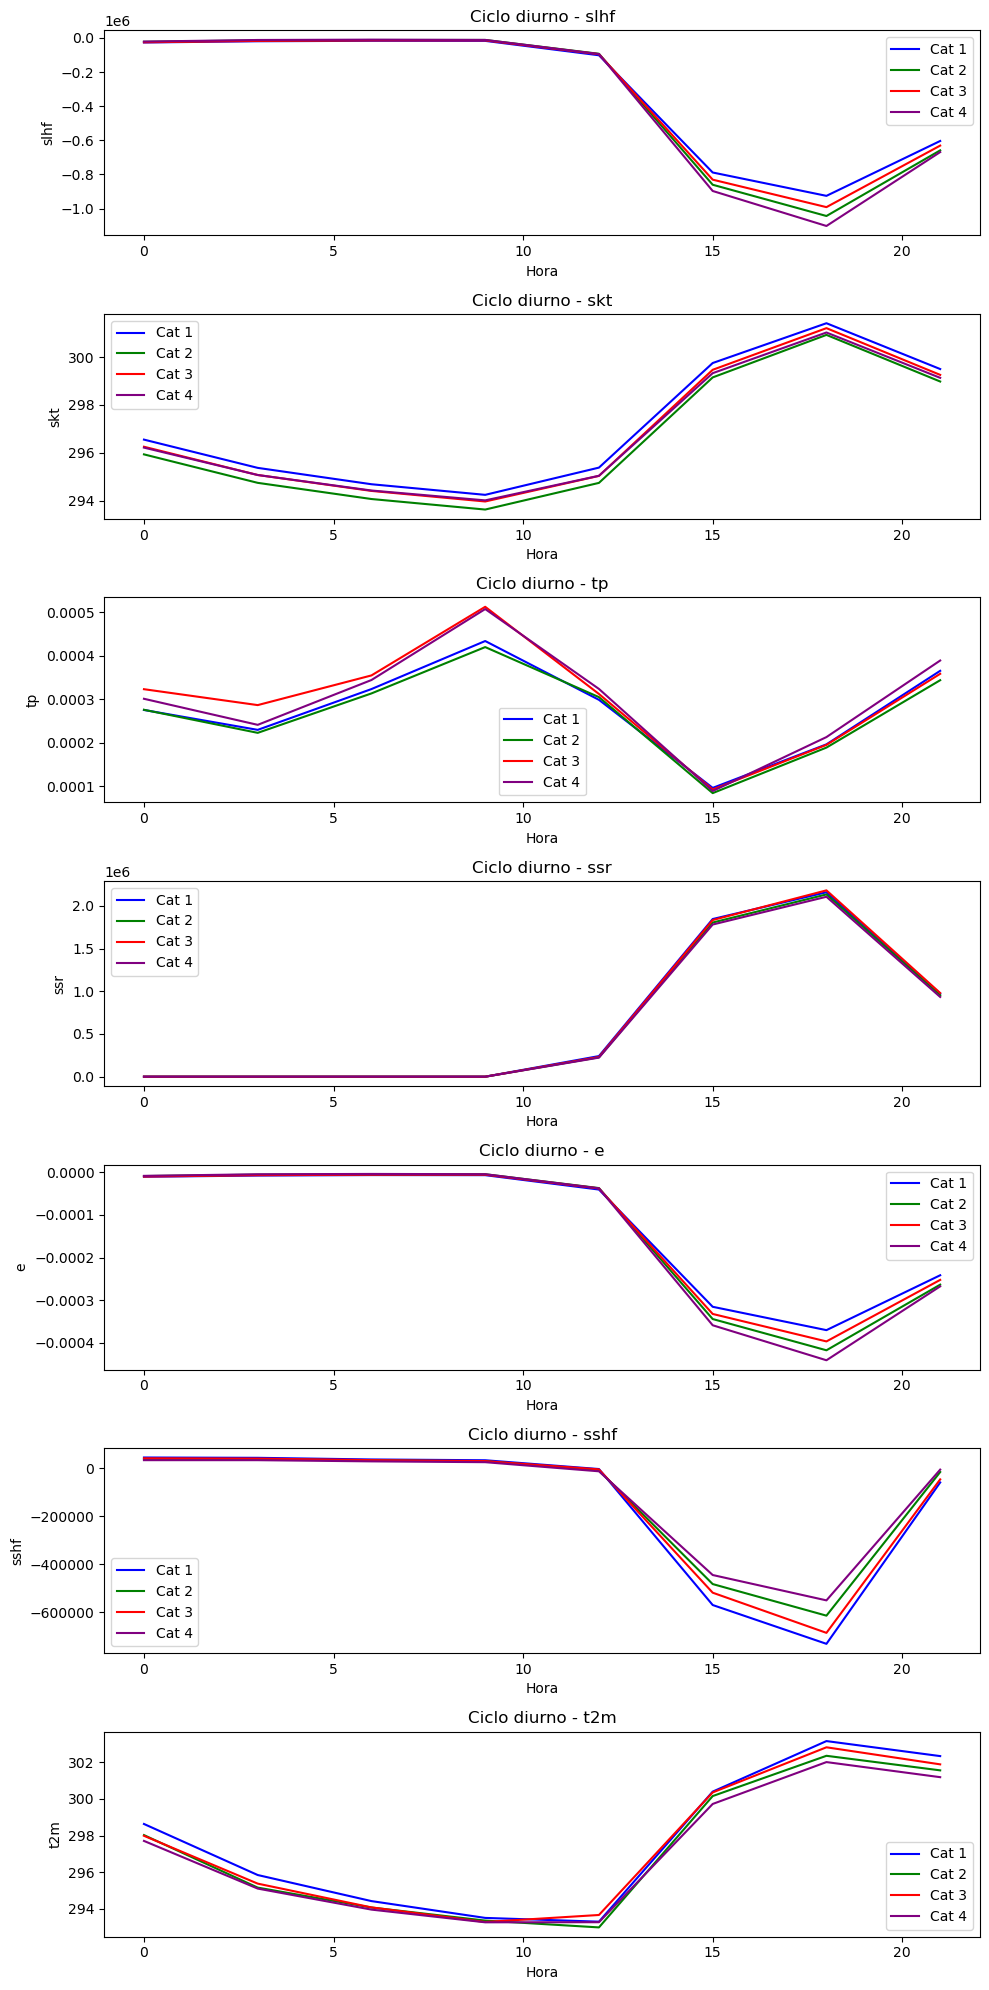

In [1]:
import xarray as xr
import pandas as pd
import os
import glob
import xarray as xr
import pandas as pd
import glob
import os
import pandas as pd
import glob
import xarray as xr
import pandas as pd
import glob
import os
import pandas as pd
import glob

# Función para reasignar el tiempo basado en la hora del nombre del archivo
def corregir_fecha(ds, archivo):
    # Extrae la hora del nombre del archivo
    hora = os.path.basename(archivo).split('_')[3][:2]
    # Extrae el año y mes de la fecha original, pero ajusta el día a '01' y la hora a la obtenida del archivo
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Directorio de origen y destino
directorio_origen = '/home/mandrade/DMARTINEZ/Paper2_final/datos/MD/'
directorio_destino = './nuevosCalculos2/'

# Crea el directorio destino si no existe
os.makedirs(directorio_destino, exist_ok=True)
print(directorio_destino)
# Busca todos los archivos que coincidan con el patrón ERA5_*.nc
archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))

# Procesa cada archivo
for archivo in archivos:
    # Abre el dataset y corrige las fechas
    ds = corregir_fecha(xr.open_dataset(archivo), archivo)
    
    # Imprime los tres primeros valores del tiempo para mostrar los meses asignados
    tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
    print(f"Archivo: {archivo}, Primeros 3 meses asignados: {tres_primeros_meses}")
    
    # Genera el nombre del archivo de salida
    nombre_archivo = os.path.basename(archivo)
    archivo_salida = os.path.join(directorio_destino, nombre_archivo)
    
    # Guarda el dataset corregido en el nuevo directorio
    ds.to_netcdf(archivo_salida)
    print(f'Guardado: {archivo_salida}')



# Variables y estaciones a analizar
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM']

#########################
for est in estaciones:
    for each in var:
        # Ruta de los archivos NetCDF
        ruta_archivos = directorio_origen
        # Corregir el patrón para usar 'each' en lugar de 'var'
        patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
        # Busca todos los archivos que coincidan con el patrón
        archivos_nc = glob.glob(patron)
        # Lista para almacenar los DataFrames
        dfs = []

        # Itera sobre los archivos encontrados
        for archivo in archivos_nc:
            # Abre el dataset y conviértelo en DataFrame
            ds = xr.open_dataset(archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

            # Agrega el DataFrame a la lista
            dfs.append(df)

        # Concatenar todos los DataFrames verticalmente
        df_combined = pd.concat(dfs, axis=0)

        # Ordenar el DataFrame combinado por la columna 'time'
        df_combined = df_combined.sort_values(by='time').reset_index(drop=True)

        # Muestra las primeras filas del DataFrame combinado
        print(df_combined.head())

        # Si deseas guardar el resultado en un archivo Excel
        output_path = f'./ERA5_{each}_{est}.xlsx'
        df_combined.to_excel(output_path, index=False)
        print(f'DataFrame combinado guardado en {output_path}')


# Lista de archivos Excel
archivos = glob.glob('./ERA5*.xlsx')

# Lista para almacenar los DataFrames
dfs = []

for archivo in archivos:
    # Extrae el nombre de la variable del archivo
    variable = archivo.split('/')[-1].split('_')[1]
    print(variable)
    # Lee el archivo Excel
    df = pd.read_excel(archivo)
    
    # Verifica si 'e' está en las columnas del DataFrame antes de renombrar
    if 'e' in df.columns:
        df = df.rename(columns={'e': variable})
    
    # Añade el DataFrame a la lista
    dfs.append(df)

# Combina todos los DataFrames en uno solo utilizando la columna de tiempo como referencia
df_concatenado = pd.concat(dfs, axis=1)

# Elimina las columnas duplicadas de tiempo
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]

# Extrae los meses y años únicos de la columna 'time'
meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()

# Imprime los meses únicos
print("Meses únicos presentes en la columna 'time':")
for mes in meses_unicos:
    print(mes)
nameConcat=estaciones[0]
    
df_concatenado.to_excel(f'./Concatenado_ERA5_{nameConcat}.xlsx')

###############################################################################################################
# Variables y estaciones a analizar
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['JAS']

#########################
for est in estaciones:
    for each in var:
        # Ruta de los archivos NetCDF
        ruta_archivos = './nuevosCalculos2/'
        # Corregir el patrón para usar 'each' en lugar de 'var'
        patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
        # Busca todos los archivos que coincidan con el patrón
        archivos_nc = glob.glob(patron)
        # Lista para almacenar los DataFrames
        dfs = []

        # Itera sobre los archivos encontrados
        for archivo in archivos_nc:
            # Abre el dataset y conviértelo en DataFrame
            ds = xr.open_dataset(archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

            # Agrega el DataFrame a la lista
            dfs.append(df)

        # Concatenar todos los DataFrames verticalmente
        df_combined = pd.concat(dfs, axis=0)

        # Ordenar el DataFrame combinado por la columna 'time'
        df_combined = df_combined.sort_values(by='time').reset_index(drop=True)

        # Muestra las primeras filas del DataFrame combinado
        print(df_combined.head())

        # Si deseas guardar el resultado en un archivo Excel
        output_path = f'./ERA5_{each}_{est}.xlsx'
        df_combined.to_excel(output_path, index=False)
        print(f'DataFrame combinado guardado en {output_path}')

# Lista de archivos Excel
archivos = glob.glob('./ERA5*.xlsx')

# Lista para almacenar los DataFrames
dfs = []

for archivo in archivos:
    # Extrae el nombre de la variable del archivo
    variable = archivo.split('/')[-1].split('_')[1]
    print(variable)
    # Lee el archivo Excel
    df = pd.read_excel(archivo)
    
    # Verifica si 'e' está en las columnas del DataFrame antes de renombrar
    if 'e' in df.columns:
        df = df.rename(columns={'e': variable})
    
    # Añade el DataFrame a la lista
    dfs.append(df)

# Combina todos los DataFrames en uno solo utilizando la columna de tiempo como referencia
df_concatenado = pd.concat(dfs, axis=1)

# Elimina las columnas duplicadas de tiempo
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]

# Extrae los meses y años únicos de la columna 'time'
meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()

# Imprime los meses únicos
print("Meses únicos presentes en la columna 'time':")
for mes in meses_unicos:
    print(mes)
nameConcat=estaciones[0]
    
df_concatenado.to_excel(f'./Concatenado_ERA5_{nameConcat}.xlsx')

import pandas as pd

# Lee los dos archivos Excel
df1 = pd.read_excel('./Concatenado_ERA5_JAS.xlsx')
df2 = pd.read_excel('./Concatenado_ERA5_MAM.xlsx')

# Concatenar los DataFrames verticalmente (uno debajo del otro)
df_concatenado = pd.concat([df1, df2], ignore_index=True)

# Asegurarse de que la columna 'time' esté en formato datetime si no lo está
df_concatenado['time'] = pd.to_datetime(df_concatenado['time'])

# Ordenar el DataFrame concatenado por la columna 'time'
df_concatenado = df_concatenado.sort_values(by='time').reset_index(drop=True)

# Muestra las primeras filas del DataFrame concatenado y ordenado
df_concatenado=df_concatenado.iloc[:,1:]
df_concatenado.to_excel('./Compilado_paper2.xlsx')
##########################################################################################################
df_categorizacion = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')
###########################################################################################################
# Convertir las columnas 'time' a formato '%Y-%m' para hacer la categorización basada en año y mes
df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')

# Hacer un merge de los DataFrames basado en el año y mes
df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')


df_merged.to_excel('./dfCombinadoCategorizado.xlsx')

# Cargar el archivo Excel combinado que el usuario acaba de subir
df_combinado_categorizado = pd.read_excel('./dfCombinadoCategorizado.xlsx')

# Convertir la columna 'time' a formato datetime para poder extraer las horas
df_combinado_categorizado['time'] = pd.to_datetime(df_combinado_categorizado['time'])

# Extraer la hora de la columna 'time'
df_combinado_categorizado['hour'] = df_combinado_categorizado['time'].dt.hour

# Agrupar por 'cat' y 'hour' y calcular el promedio de las demás columnas
df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()

# Mostrar el resultado
df_promedios

# Eliminar las columnas sin sentido 'Unnamed: 0' y 'year_month'
df_promedios_ciclo_diurno = df_promedios.drop(columns=['Unnamed: 0', 'year_month'])
df_promedios_ciclo_diurno


df_promedios_ciclo_diurno.to_excel('./cicloDiurno.xlsx')

import matplotlib.pyplot as plt

# Asignar colores por categoría
colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}

# Variables a plotear
variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']

# Crear subplots para cada variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))

# Iterar sobre las variables y plotear el ciclo diurno para cada categoría
for i, var in enumerate(variables):
    ax = axes[i]
    for cat in df_promedios_ciclo_diurno['cat'].unique():
        # Filtrar por categoría
        df_cat = df_promedios_ciclo_diurno[df_promedios_ciclo_diurno['cat'] == cat]
        # Plotear la variable para cada categoría
        ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
    
    # Ajustes del gráfico
    ax.set_title(f'Ciclo diurno - {var}')
    ax.set_xlabel('Hora')
    ax.set_ylabel(var)
    ax.legend()

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.savefig('/home/mandrade/variacionDiurna.png')
# Mostrar los gráficos
plt.show()

In [3]:
# import xarray as xr
# import pandas as pd
# import os
# import glob
# import matplotlib.pyplot as plt

# # Función para reasignar el tiempo basado en la hora del nombre del archivo
# def corregir_fecha(ds, archivo):
#     hora = os.path.basename(archivo).split('_')[3][:2]
#     nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
#     ds['time'] = nuevas_fechas
#     return ds

# # Directorio de origen y destino
# directorio_origen = '/home/mandrade/DMARTINEZ/Paper2_final/datos/MD/'
# directorio_destino = './nuevosCalculos2/'

# # Crea el directorio destino si no existe
# os.makedirs(directorio_destino, exist_ok=True)

# # Busca todos los archivos que coincidan con el patrón ERA5_*.nc
# archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))

# # Procesa cada archivo
# for archivo in archivos:
#     ds = corregir_fecha(xr.open_dataset(archivo), archivo)
#     tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
#     print(f"Archivo: {archivo}, Primeros 3 meses asignados: {tres_primeros_meses}")
    
#     nombre_archivo = os.path.basename(archivo)
#     archivo_salida = os.path.join(directorio_destino, nombre_archivo)
#     ds.to_netcdf(archivo_salida)
#     print(f'Guardado: {archivo_salida}')

# # Variables y estaciones a analizar
# var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
# estaciones = ['MAM']

# for est in estaciones:
#     for each in var:
#         ruta_archivos = directorio_origen
#         patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
#         archivos_nc = glob.glob(patron)
#         dfs = []

#         for archivo in archivos_nc:
#             ds = xr.open_dataset(archivo)
#             df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])
#             dfs.append(df)

#         df_combined = pd.concat(dfs, axis=0).sort_values(by='time').reset_index(drop=True)
#         print(df_combined.head())

#         output_path = f'./ERA5_{each}_{est}.xlsx'
#         df_combined.to_excel(output_path, index=False)
#         print(f'DataFrame combinado guardado en {output_path}')

# # Combina archivos Excel
# archivos = glob.glob('./ERA5*.xlsx')
# dfs = []

# for archivo in archivos:
#     variable = archivo.split('/')[-1].split('_')[1]
#     df = pd.read_excel(archivo)
#     if 'e' in df.columns:
#         df = df.rename(columns={'e': variable})
#     dfs.append(df)

# df_concatenado = pd.concat(dfs, axis=1).loc[:, ~df_concatenado.columns.duplicated()]
# meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()

# for mes in meses_unicos:
#     print(mes)

# nameConcat = estaciones[0]
# df_concatenado.to_excel(f'./Concatenado_ERA5_{nameConcat}.xlsx')

# # Concatenar y ordenar DataFrames
# df1 = pd.read_excel('./Concatenado_ERA5_JAS.xlsx')
# df2 = pd.read_excel('./Concatenado_ERA5_MAM.xlsx')

# df_concatenado = pd.concat([df1, df2], ignore_index=True)
# df_concatenado['time'] = pd.to_datetime(df_concatenado['time'])
# df_concatenado = df_concatenado.sort_values(by='time').reset_index(drop=True)
# df_concatenado = df_concatenado.iloc[:, 1:]

# df_concatenado.to_excel('./Compilado_paper2.xlsx')

# # Cargar y categorizar datos
# df_categorizacion = pd.read_excel('./categorizacion.xlsx')
# df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
# df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')

# df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')
# df_merged.to_excel('./dfCombinadoCategorizado.xlsx')

# # Agrupar por categoría y hora
# df_combinado_categorizado = pd.read_excel('./dfCombinadoCategorizado.xlsx')
# df_combinado_categorizado['time'] = pd.to_datetime(df_combinado_categorizado['time'])
# df_combinado_categorizado['hour'] = df_combinado_categorizado['time'].dt.hour

# df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()
# df_promedios_ciclo_diurno = df_promedios.drop(columns=['Unnamed: 0', 'year_month'])
# df_promedios_ciclo_diurno.to_excel('./cicloDiurno.xlsx')

# # Graficar el ciclo diurno
# colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}
# variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']

# fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))

# for i, var in enumerate(variables):
#     ax = axes[i]
#     for cat in df_promedios_ciclo_diurno['cat'].unique():
#         df_cat = df_promedios_ciclo_diurno[df_promedios_ciclo_diurno['cat'] == cat]
#         ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
    
#     ax.set_title(f'Ciclo diurno - {var}')
#     ax.set_xlabel('Hora')
#     ax.set_ylabel(var)
#     ax.legend()

# plt.tight_layout()
# plt.savefig('./variacionDiurna.png')
# plt.show()


/tmp/ipykernel_42160/1798009351.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()


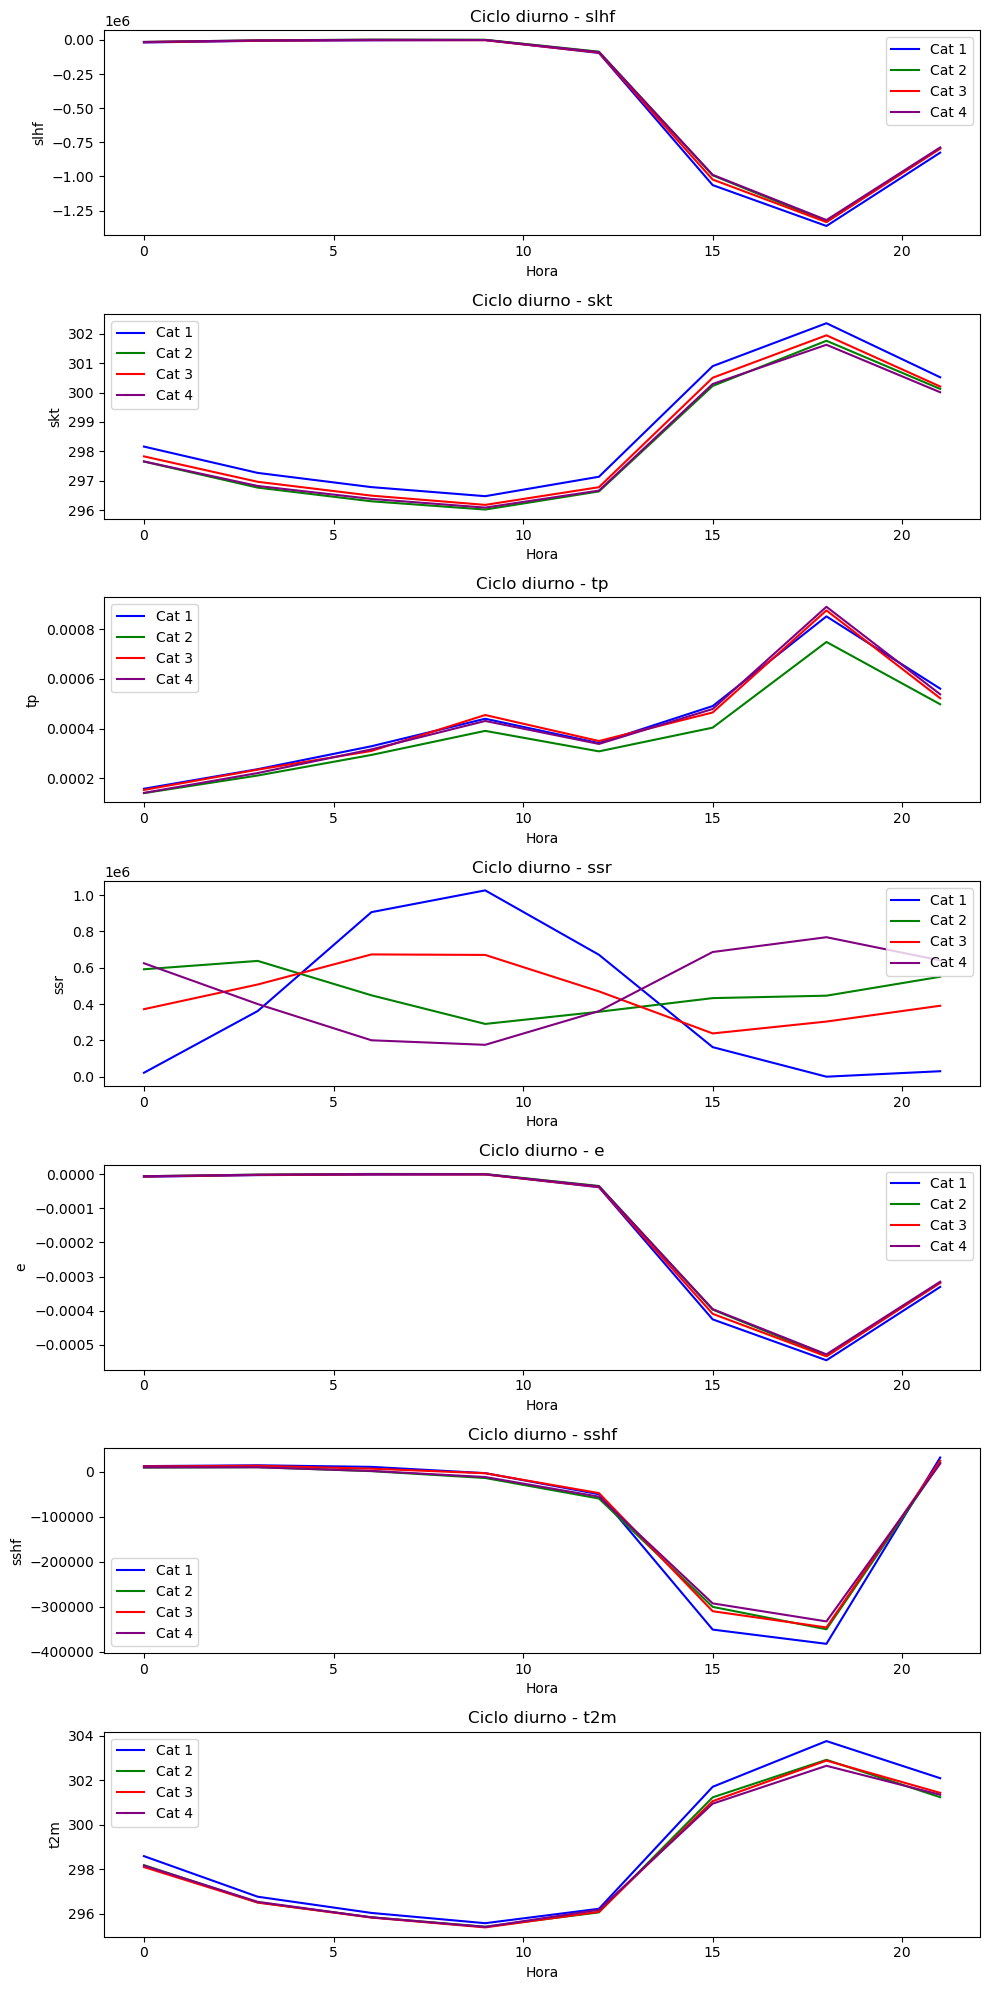

In [46]:
import xarray as xr
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import shutil
import os

# Ruta del directorio
directorio =  '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'

# Eliminar todo el contenido del directorio
for filename in os.listdir(directorio):
    file_path = os.path.join(directorio, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Eliminar archivo o enlace
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Eliminar directorio
    except Exception as e:
        print(f'No se pudo eliminar {file_path}. Razón: {e}')
        
        
def corregir_fecha(ds, archivo):
    hora = os.path.basename(archivo).split('_')[3][:2]
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds



directorio_origen = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/'
directorio_destino = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'
os.makedirs(directorio_destino, exist_ok=True)
archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))
for archivo in archivos:
    ds = corregir_fecha(xr.open_dataset(archivo), archivo)
    tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
    nombre_archivo = os.path.basename(archivo)
    archivo_salida = os.path.join(directorio_destino, nombre_archivo)
    ds.to_netcdf(archivo_salida)
####################################################################################
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM']
for est in estaciones:
    for each in var:
        ruta_archivos = directorio_destino
        patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
        archivos_nc = glob.glob(patron)
        dfs = []
        for archivo in archivos_nc:
            ds = xr.open_dataset(archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])
            dfs.append(df)
        df_combined = pd.concat(dfs, axis=0)
        df_combined = df_combined.sort_values(by='time').reset_index(drop=True)
        output_path = f'{directorio_destino}ERA5_{each}_{est}.xlsx'
        df_combined.to_excel(output_path, index=False)
archivos = glob.glob(f'{directorio_destino}ERA5*.xlsx')
dfs = []
for archivo in archivos:
    variable = archivo.split('/')[-1].split('_')[1]
    df = pd.read_excel(archivo)
    if 'e' in df.columns:
        df = df.rename(columns={'e': variable})
    dfs.append(df)
df_concatenado = pd.concat(dfs, axis=1)
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]
meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()
nameConcat=estaciones[0]
df_concatenado.to_excel(f'{directorio_destino}Concatenado_ERA5_{nameConcat}.xlsx')
##################################################################
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['JAS']
for est in estaciones:
    for each in var:
        ruta_archivos = directorio_destino
        patron = os.path.join(ruta_archivos, f'ERA5_{each}_{est}_*.nc')
        archivos_nc = glob.glob(patron)
        dfs = []
        for archivo in archivos_nc:
            ds = xr.open_dataset(archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])
            dfs.append(df)
        df_combined = pd.concat(dfs, axis=0)
        df_combined = df_combined.sort_values(by='time').reset_index(drop=True)
        output_path = f'{directorio_destino}ERA5_{each}_{est}.xlsx'
        df_combined.to_excel(output_path, index=False)
        # print(f'DataFrame combinado guardado en {output_path}')
        
    
archivos = glob.glob(f'{directorio_destino}ERA5*.xlsx')
dfs = []
for archivo in archivos:
    variable = archivo.split('/')[-1].split('_')[1]
    # print(variable)
    df = pd.read_excel(archivo)
    if 'e' in df.columns:
        df = df.rename(columns={'e': variable})
    dfs.append(df)
df_concatenado = pd.concat(dfs, axis=1)
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]
meses_unicos = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y-%m').unique()
nameConcat=estaciones[0]
df_concatenado.to_excel(f'{directorio_destino}Concatenado_ERA5_{nameConcat}.xlsx')
####################################################################################################
df1 = pd.read_excel(f'{directorio_destino}Concatenado_ERA5_JAS.xlsx')
df2 = pd.read_excel(f'{directorio_destino}Concatenado_ERA5_MAM.xlsx')
df_concatenado = df1 # pd.concat([df1, df2], ignore_index=True)
df_concatenado['time'] = pd.to_datetime(df_concatenado['time'])
df_concatenado = df_concatenado.sort_values(by='time').reset_index(drop=True)
df_concatenado=df_concatenado.iloc[:,1:]
df_concatenado.to_excel(f'{directorio_destino}Compilado_paper2.xlsx')
df_categorizacion = pd.read_excel(f'/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')
df_concatenado['year_month'] = pd.to_datetime(df_concatenado['time']).dt.strftime('%Y')
df_categorizacion['year_month'] = pd.to_datetime(df_categorizacion['time']).dt.strftime('%Y')
df_merged = pd.merge(df_concatenado, df_categorizacion[['year_month', 'cat']], on='year_month', how='left')
df_merged.to_excel(f'{directorio_destino}dfCombinadoCategorizado.xlsx')
df_combinado_categorizado = pd.read_excel(f'{directorio_destino}dfCombinadoCategorizado.xlsx')
df_combinado_categorizado['time'] = pd.to_datetime(df_combinado_categorizado['time'])
df_combinado_categorizado['hour'] = df_combinado_categorizado['time'].dt.hour
df_promedios = df_combinado_categorizado.groupby(['cat', 'hour']).mean().reset_index()
df_promedios_ciclo_diurno = df_promedios.drop(columns=['Unnamed: 0', 'year_month'])
df_promedios_ciclo_diurno.to_excel(f'{directorio_destino}cicloDiurno.xlsx')
colores = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}
variables = ['slhf', 'skt', 'tp', 'ssr', 'e', 'sshf', 't2m']
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 20))
for i, var in enumerate(variables):
    ax = axes[i]
    for cat in df_promedios_ciclo_diurno['cat'].unique():
        df_cat = df_promedios_ciclo_diurno[df_promedios_ciclo_diurno['cat'] == cat]
        ax.plot(df_cat['hour'], df_cat[var], label=f'Cat {int(cat)}', color=colores[int(cat)])
    ax.set_title(f'Ciclo diurno - {var}')
    ax.set_xlabel('Hora')
    ax.set_ylabel(var)
    ax.legend()

plt.tight_layout()
plt.savefig('/home/mandrade/variacionDiurna.png')
plt.show()

In [ ]:
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM','JAS']



ds = xr.open_mfdataset('/home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/ERA5_ssr_JAS_*.nc', combine='nested', concat_dim='time')
ds=ds.load()
ds =ds.sortby('time')
###############################
import xarray as xr
ds = ds.sortby('time')
ds


ds2 = xr.open_mfdataset('/home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/ERA5_skt_JAS_*.nc', combine='nested', concat_dim='time')
ds2=ds2.load()
ds2 =ds2.sortby('time')
###############################
import xarray as xr
ds2 = ds2.sortby('time')
ds2


dsTotal = xr.Dataset()
dsTotal['ssr']=ds['ssr']
dsTotal['skt']=ds2['skt']
dsTotal
# # ds_resample = ds.resample(time='3H').mean()
# ds_diurnal_cycle = ds.groupby('time.hour').mean()
# ########################################
# ds_diurnal_cycle.sel(lat=0,lon=0,method='nearest')['ssr'].plot()

<xarray.Dataset> Size: 12kB
Dimensions:  (time: 504, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 4kB 2000-07-01T09:00:00 ... 2023-09-02T06:...
  * lon      (lon) float64 8B 0.0
  * lat      (lat) float64 8B 0.0
Data variables:
    ssr      (time, lat, lon) float64 4kB 0.0 1.164e+05 ... 2.328e-10 2.328e-10
    skt      (time, lat, lon) float64 4kB 294.5 295.0 300.2 ... nan nan nan

Datos del archivo /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_ssr_JAS_03Z_2000_23AmP.nc:
<xarray.Dataset> Size: 1kB
Dimensions:  (time: 72, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 576B 2000-07-02T03:00:00 ... 2023-09-02T03...
  * lon      (lon) float64 8B 0.0
  * lat      (lat) float64 8B 0.0
Data variables:
    ssr      (time, lat, lon) float64 576B ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 28 21:35:36 2024: cdo fldmean -sellonlatbox,-72,-70...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
Datos del archivo /home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/ERA5_ssr_MAM_18Z_2000_23AmP.nc:
<xarray.Dataset> Size: 1kB
Dimensions:  (time: 72, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 576B 2000-03-01T18:00:00 ... 2023-05-01T18...
  * lon      (lon) float64 8B 0.0
  * lat      

/tmp/ipykernel_41183/2158824935.py:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedios_ciclo_diurno = df_concatenado.groupby(df_concatenado['time'].dt.hour).mean().reset_index()


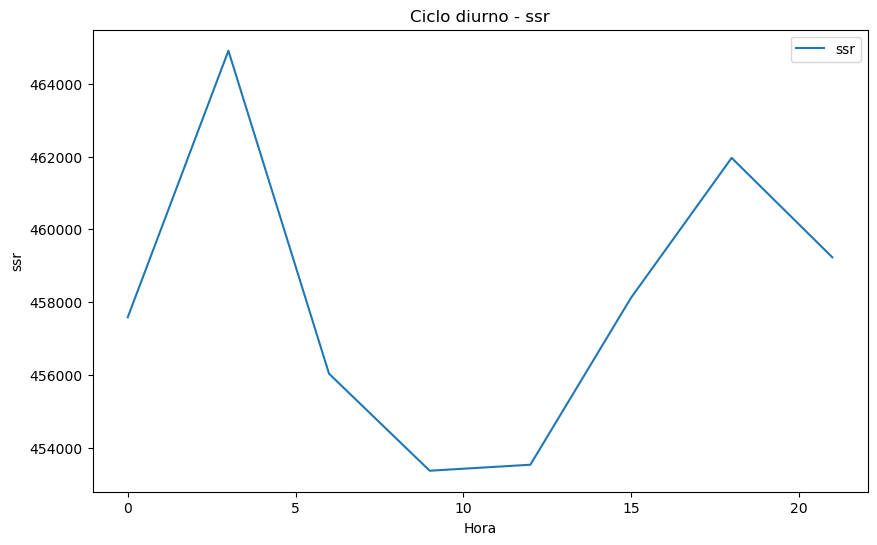

In [ ]:
import xarray as xr
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

# Directorios
directorio_origen = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos/'
directorio_destino = '/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/'
os.makedirs(directorio_destino, exist_ok=True)

# Función para corregir fechas
def corregir_fecha(ds, archivo):
    hora = os.path.basename(archivo).split('_')[3][:2]
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Verificar archivos netCDF de ssr
archivos_ssr = glob.glob(os.path.join(directorio_origen, 'ERA5_ssr_*.nc'))
for archivo in archivos_ssr:
    ds_ssr = xr.open_dataset(archivo)
    print(f"Datos del archivo {archivo}:")
    print(ds_ssr)

# Procesar archivos de todas las variables
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM']
for est in estaciones:
    for each in var:
        patron = os.path.join(directorio_origen, f'ERA5_{each}_{est}_*.nc')
        archivos_nc = glob.glob(patron)
        dfs = []
        for archivo in archivos_nc:
            ds = corregir_fecha(xr.open_dataset(archivo), archivo)
            df = ds.to_dataframe().reset_index().drop(columns=['lon', 'lat'])
            dfs.append(df)
        if dfs:
            df_combined = pd.concat(dfs, axis=0)
            df_combined = df_combined.sort_values(by='time').reset_index(drop=True)
            output_path = f'{directorio_destino}ERA5_{each}_{est}.xlsx'
            df_combined.to_excel(output_path, index=False)
            print(f'Archivo guardado: {output_path}')

# Verificar y eliminar columnas duplicadas
archivos_xlsx = glob.glob(f'{directorio_destino}ERA5_*.xlsx')
dfs = []
for archivo in archivos_xlsx:
    variable = archivo.split('/')[-1].split('_')[1]
    df = pd.read_excel(archivo)
    if 'e' in df.columns:  # Renombrar si es necesario
        df = df.rename(columns={'e': variable})
    dfs.append(df)

# Concatenar DataFrames y eliminar columnas duplicadas
df_concatenado = pd.concat(dfs, axis=1)
df_concatenado = df_concatenado.loc[:, ~df_concatenado.columns.duplicated()]
print("Columnas después de eliminar duplicadas:", df_concatenado.columns)

# Verificar rango de valores de ssr
if 'ssr' in df_concatenado.columns:
    print("Descripción de los valores de ssr:")
    print(df_concatenado['ssr'].describe())
else:
    print("La columna 'ssr' no se encuentra en los datos concatenados.")

# Verificar si 'ssr' está en todas las categorías
df_concatenado['time'] = pd.to_datetime(df_concatenado['time'], errors='coerce')  # Evitar errores de formato
df_concatenado['year_month'] = df_concatenado['time'].dt.strftime('%Y-%m')

# Agrupación por horas para verificar 'ssr'
df_promedios_ciclo_diurno = df_concatenado.groupby(df_concatenado['time'].dt.hour).mean().reset_index()
if 'ssr' in df_promedios_ciclo_diurno.columns:
    print("Variable 'ssr' presente en el ciclo diurno.")
else:
    print("Variable 'ssr' ausente en el ciclo diurno.")

# Visualización de la variable 'ssr'
if 'ssr' in df_promedios_ciclo_diurno.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_promedios_ciclo_diurno['time'], df_promedios_ciclo_diurno['ssr'], label='ssr')
    plt.title('Ciclo diurno - ssr')
    plt.xlabel('Hora')
    plt.ylabel('ssr')
    plt.legend()
    plt.show()
else:
    print("No se puede graficar 'ssr' porque está ausente en los datos procesados.")


/tmp/ipykernel_42160/3443348671.py:65: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = ds_merged.groupby(['cat', 'hour']).mean()


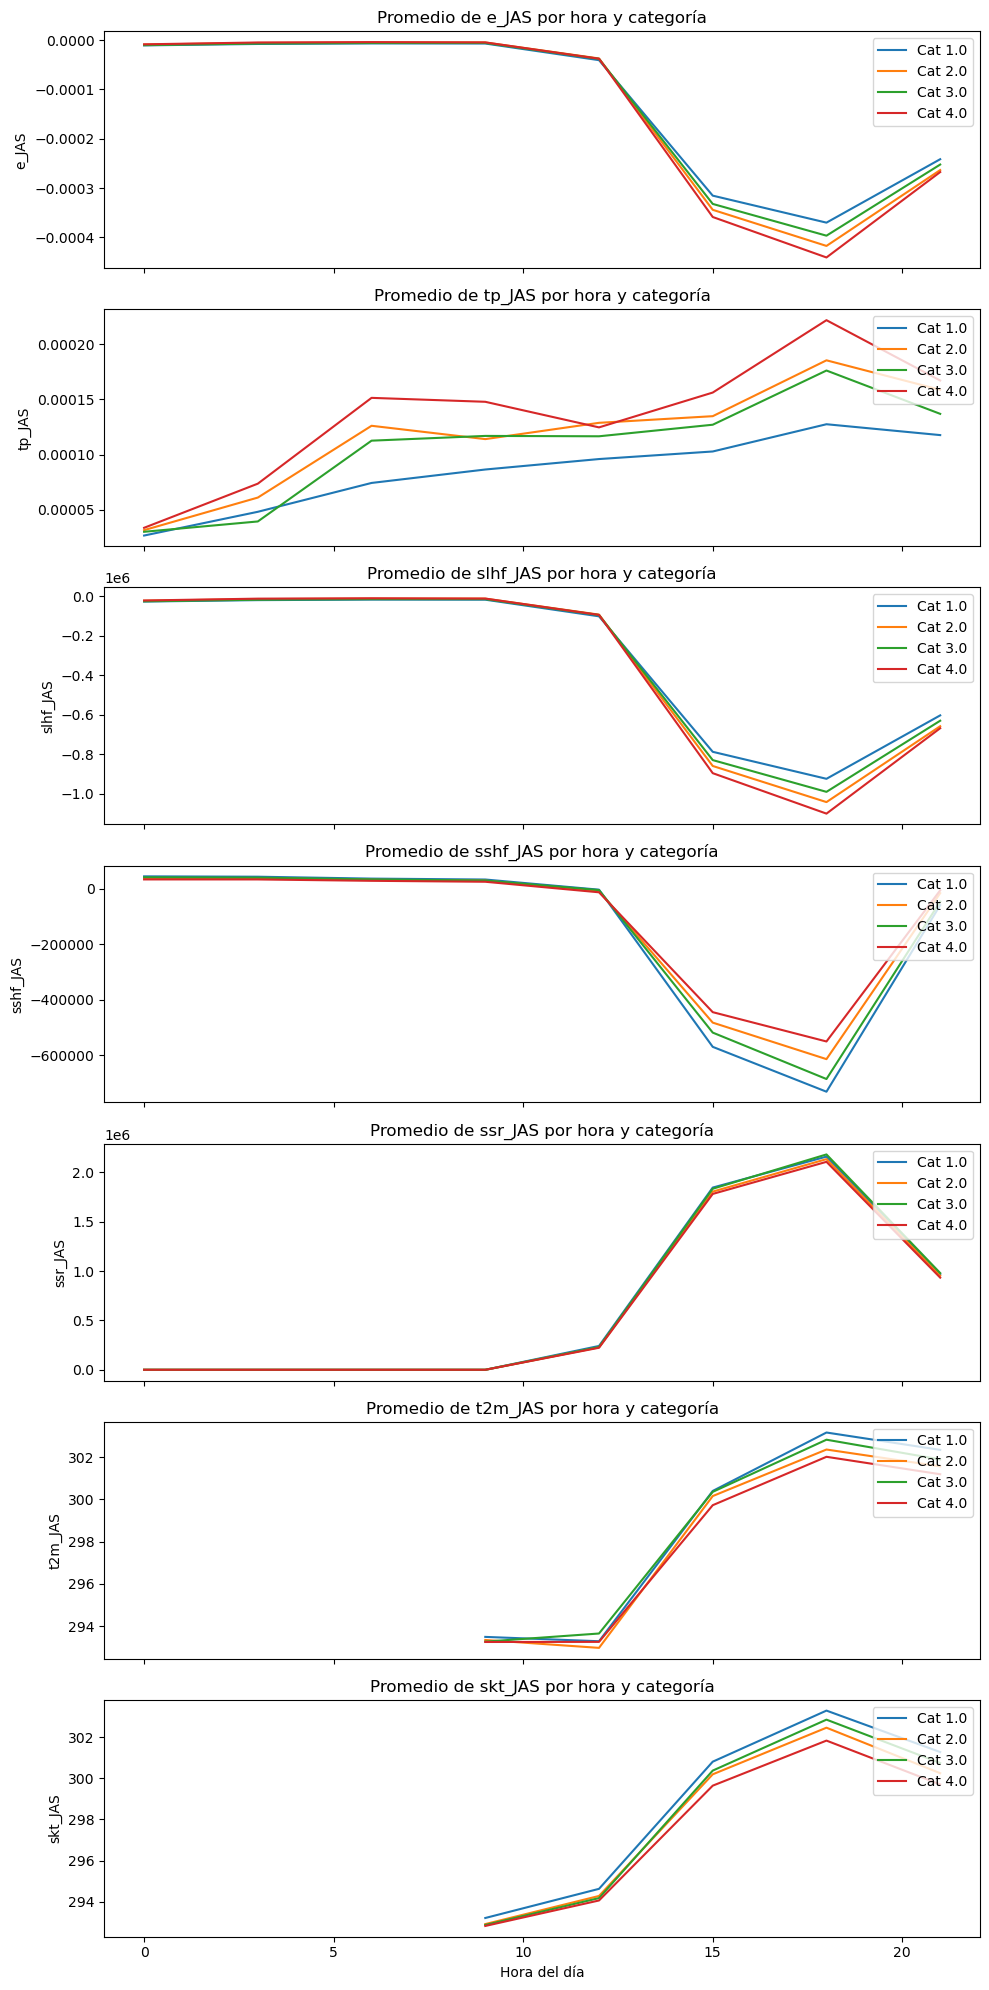

In [64]:
import xarray as xr
import pandas as pd

# Definir las variables y estaciones
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['JAS']
nameMon=estaciones[0]
# Función para cargar, ordenar y retornar los datos de cada variable y estación, asegurando que sean float
def agregarVal(variable, estacion):
    path = f'/home/mandrade/DMARTINEZ/Paper2_final/datos/MD/ERA5_{variable}_{estacion}_*.nc'
    
    # Intentar cargar los datos desde los archivos
    try:
        ds = xr.open_mfdataset(path, combine='nested', concat_dim='time')
        ds = ds.load()  # Cargar los datos en memoria
        ds = ds.sortby('time')  # Ordenar por la coordenada 'time'
        
        # Obtener la primera variable del dataset
        primera_variable = list(ds.data_vars)[0]
        
        # Convertir a float explícitamente y retornar la variable
        return ds[primera_variable].astype(float)
    
    except FileNotFoundError:
        print(f"Archivo no encontrado: {path}")
        return None

# Crear un dataset vacío para almacenar todas las variables
dsTotal = xr.Dataset()

# Iterar sobre las estaciones y variables
for estacion in estaciones:
    for variable in var:
        resultado = agregarVal(variable, estacion)
        if resultado is not None:
            dsTotal[f'{variable}_{estacion}'] = resultado

# Convertir el dataset a un DataFrame, eliminando las columnas de latitud y longitud
dsTotal_df = dsTotal.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

# Crear la nueva columna 'ANHOMES' a partir del año y mes de la columna 'time'
dsTotal_df['ANHOMES'] = dsTotal_df['time'].dt.strftime('%Y')  # Formato YYYY-MM

# Cargar la categorización desde el archivo Excel
dsCat = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')

# Crear la columna 'ANHOMES' en la categorización (asumiendo que tiene una columna 'time')
dsCat['ANHOMES'] = pd.to_datetime(dsCat['time']).dt.strftime('%Y')  # Formato YYYY-MM

# Hacer un merge entre el dataset y la categorización usando la columna 'ANHOMES'
ds_merged = pd.merge(dsTotal_df, dsCat, on='ANHOMES', how='left')  # 'left' para no perder datos del dataset
# Mostrar el resultado
ds_merged = ds_merged[ds_merged['cat'] > 0].drop(columns=['time_y', 'ANHOMES']).rename(columns={'time_x': 'time'})
ds_merged.to_excel('combinado0609.xlsx')
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que la columna 'time' sea de tipo datetime
ds_merged['time'] = pd.to_datetime(ds_merged['time'])

# Extraer la hora de la columna 'time'
ds_merged['hour'] = ds_merged['time'].dt.hour

# Agrupar por categoría (cat) y hora
grouped = ds_merged.groupby(['cat', 'hour']).mean()

# Restablecer el índice para facilitar la manipulación posterior
grouped = grouped.reset_index()

# Definir las variables que quieres graficar
variables = [f'e_{nameMon}', f'tp_{nameMon}', f'slhf_{nameMon}', f'sshf_{nameMon}', f'ssr_{nameMon}', f't2m_{nameMon}', f'skt_{nameMon}']

# Crear subplots
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 20), sharex=True)

for i, var in enumerate(variables):
    ax = axs[i]
    for cat in grouped['cat'].unique():
        data_cat = grouped[grouped['cat'] == cat]
        
        # Graficar cada categoría para la variable en cuestión
        ax.plot(data_cat['hour'], data_cat[var], label=f'Cat {cat}')
    
    # Añadir etiquetas y título a cada subplot
    ax.set_ylabel(var)
    ax.set_title(f'Promedio de {var} por hora y categoría')
    ax.legend(loc='upper right')

# Etiqueta compartida para el eje x
axs[-1].set_xlabel('Hora del día')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()


In [25]:
import xarray as xr
import pandas as pd

# Definir las variables y estaciones
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['JAS']
nameMon=estaciones[0]
# Función para cargar, ordenar y retornar los datos de cada variable y estación, asegurando que sean float
def agregarVal(variable, estacion):
    path = f'/home/mandrade/DMARTINEZ/paper2_dataordenada/nuevosCalculos2/ERA5_{variable}_{estacion}_*.nc'
    
    # Intentar cargar los datos desde los archivos
    try:
        ds = xr.open_mfdataset(path, combine='nested', concat_dim='time')
        ds = ds.load()  # Cargar los datos en memoria
        ds = ds.sortby('time')  # Ordenar por la coordenada 'time'
        
        # Obtener la primera variable del dataset
        primera_variable = list(ds.data_vars)[0]
        
        # Convertir a float explícitamente y retornar la variable
        return ds[primera_variable].astype(float)
    
    except FileNotFoundError:
        print(f"Archivo no encontrado: {path}")
        return None

# Crear un dataset vacío para almacenar todas las variables
dsTotal = xr.Dataset()

# Iterar sobre las estaciones y variables
for estacion in estaciones:
    for variable in var:
        resultado = agregarVal(variable, estacion)
        if resultado is not None:
            dsTotal[f'{variable}_{estacion}'] = resultado

# Convertir el dataset a un DataFrame, eliminando las columnas de latitud y longitud
dsTotal_df = dsTotal.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

# Crear la nueva columna 'ANHOMES' a partir del año y mes de la columna 'time'
dsTotal_df['ANHOMES'] = dsTotal_df['time'].dt.strftime('%Y')  # Formato YYYY-MM

# Cargar la categorización desde el archivo Excel
dsCat = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')

# Crear la columna 'ANHOMES' en la categorización (asumiendo que tiene una columna 'time')
dsCat['ANHOMES'] = pd.to_datetime(dsCat['time']).dt.strftime('%Y')  # Formato YYYY-MM

# Hacer un merge entre el dataset y la categorización usando la columna 'ANHOMES'
ds_merged = pd.merge(dsTotal_df, dsCat, on='ANHOMES', how='left')  # 'left' para no perder datos del dataset
# Mostrar el resultado
ds_merged = ds_merged[ds_merged['cat'] > 0].drop(columns=['time_y', 'ANHOMES']).rename(columns={'time_x': 'time'})

import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que la columna 'time' sea de tipo datetime
ds_merged['time'] = pd.to_datetime(ds_merged['time'])

# Extraer la hora de la columna 'time'
ds_merged['hour'] = ds_merged['time'].dt.hour

# Agrupar por categoría (cat) y hora
grouped = ds_merged.groupby(['cat', 'hour']).mean()

# Restablecer el índice para facilitar la manipulación posterior
grouped = grouped.reset_index()

# Definir las variables que quieres graficar
variables = [f'e_{nameMon}', f'tp_{nameMon}', f'slhf_{nameMon}', f'sshf_{nameMon}', f'ssr_{nameMon}', f't2m_{nameMon}', f'skt_{nameMon}']

# Crear subplots
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 20), sharex=True)

for i, var in enumerate(variables):
    ax = axs[i]
    for cat in grouped['cat'].unique():
        data_cat = grouped[grouped['cat'] == cat]
        
        # Graficar cada categoría para la variable en cuestión
        ax.plot(data_cat['hour'], data_cat[var], label=f'Cat {cat}')
    
    # Añadir etiquetas y título a cada subplot
    ax.set_ylabel(var)
    ax.set_title(f'Promedio de {var} por hora y categoría')
    ax.legend(loc='upper right')

# Etiqueta compartida para el eje x
axs[-1].set_xlabel('Hora del día')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()


,time,cat
0,2000-07-02,NaN
1,2000-08-02,NaN
2,2000-09-02,NaN
3,2001-07-02,2.0
4,2001-08-02,2.0
...,...,...
67,2022-08-02,4.0
68,2022-09-02,4.0
69,2023-07-02,1.0
70,2023-08-02,1.0


,time,e_MAM,tp_MAM,slhf_MAM,sshf_MAM,ssr_MAM,t2m_MAM,skt_MAM,cat
100,2004-03-01 21:00:00,-3.315052e-04,0.000692,-8.290239e+05,-40662.740237,1.037163e+06,300.928129,300.427558,NaN
101,2004-03-02 00:00:00,-7.952325e-06,0.000169,-1.988526e+04,8090.235608,0.000000e+00,NaN,NaN,NaN
102,2004-03-02 03:00:00,-4.179083e-06,0.000233,-1.044973e+04,8984.258591,0.000000e+00,NaN,NaN,NaN
103,2004-03-02 06:00:00,-2.417655e-06,0.000303,-6.044300e+03,5282.488129,0.000000e+00,NaN,NaN,NaN
104,2004-04-01 09:00:00,-5.583463e-07,0.000133,-1.398066e+03,-1860.446705,0.000000e+00,296.398065,296.475130,NaN
...,...,...,...,...,...,...,...,...,...
195,2008-03-01 18:00:00,-5.012267e-04,0.000610,-1.253465e+06,-463345.188563,2.105295e+06,302.260459,301.730740,NaN
196,2008-03-01 21:00:00,-3.271088e-04,0.000358,-8.180414e+05,-51518.174661,1.070160e+06,301.796971,300.304580,NaN
197,2008-03-02 00:00:00,-8.334782e-06,0.000097,-2.084468e+04,15696.127749,0.000000e+00,NaN,NaN,NaN
198,2008-03-02 03:00:00,-4.872589e-06,0.000193,-1.217856e+04,17971.455406,0.000000e+00,NaN,NaN,NaN


## FUNCIONA DEFINITIVO 

In [167]:
import xarray as xr
import pandas as pd
import os
import glob

# Función para reasignar el tiempo basado en la hora del nombre del archivo
def corregir_fecha(ds, archivo):
    # Extrae la hora del nombre del archivo
    hora = os.path.basename(archivo).split('_')[3][:2]
    # Extrae el año y mes de la fecha original, pero ajusta el día a '01' y la hora a la obtenida del archivo
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

# Directorio de origen y destino
directorio_origen =  '/home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/'
directorio_destino = '/home/mandrade/DMARTINEZ/Paper2_final/datos/LOR1/nuevosCalculos2/'

# Crea el directorio destino si no existe
os.makedirs(directorio_destino, exist_ok=True)

# Busca todos los archivos que coincidan con el patrón ERA5_*.nc
archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))

# Procesa cada archivo
for archivo in archivos:
    # Abre el dataset y corrige las fechas
    ds = corregir_fecha(xr.open_dataset(archivo), archivo)
    
    # Imprime los tres primeros valores del tiempo para mostrar los meses asignados
    tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
    # print(f"Archivo: {archivo}, Primeros 3 meses asignados: {tres_primeros_meses}")
    
    # Genera el nombre del archivo de salida
    nombre_archivo = os.path.basename(archivo)
    archivo_salida = os.path.join(directorio_destino, nombre_archivo)
    
    # Guarda el dataset corregido en el nuevo directorio
    ds.to_netcdf(archivo_salida)
    # print(f'Guardado: {archivo_salida}')


In [168]:
### corrige nombre de archivo
import os

# Ruta al directorio que contiene los archivos
directorio = directorio_origen

# Iterar sobre los archivos en el directorio
for archivo in os.listdir(directorio):
    # Verificar si el archivo contiene 'MD' en su nombre
    if 'MD' in archivo:
        # Crear el nuevo nombre del archivo eliminando 'MD'
        nuevo_nombre = archivo.replace('MD_', '')
        
        # Obtener la ruta completa del archivo original y del nuevo archivo
        ruta_original = os.path.join(directorio, archivo)
        ruta_nueva = os.path.join(directorio, nuevo_nombre)
        
        # Renombrar el archivo
        os.rename(ruta_original, ruta_nueva)
        print(f'Archivo renombrado: {archivo} -> {nuevo_nombre}')
        
        
### corrige fechas
def corregir_fecha(ds, archivo):
    hora = os.path.basename(archivo).split('_')[3][:2]
    nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
    ds['time'] = nuevas_fechas
    return ds

directorio_origen = directorio
directorio_destino = directorio+'nuevosCalculos2/'
os.makedirs(directorio_destino, exist_ok=True)
archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))
for archivo in archivos:
    ds = corregir_fecha(xr.open_dataset(archivo), archivo)
    tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
    nombre_archivo = os.path.basename(archivo)
    archivo_salida = os.path.join(directorio_destino, nombre_archivo)
    ds.to_netcdf(archivo_salida)

import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# Definir las variables y estaciones
var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
estaciones = ['MAM']
nameMon=estaciones[0]
# Función para cargar, ordenar y retornar los datos de cada variable y estación, asegurando que sean float
def agregarVal(variable, estacion):
    path = f'{directorio_destino}/ERA5_{variable}_{estacion}_*.nc'
    
    # Intentar cargar los datos desde los archivos
    try:
        ds = xr.open_mfdataset(path, combine='nested', concat_dim='time')
        ds = ds.load()  # Cargar los datos en memoria
        ds = ds.sortby('time')  # Ordenar por la coordenada 'time'
        
        # Obtener la primera variable del dataset
        primera_variable = list(ds.data_vars)[0]
        
        # Convertir a float explícitamente y retornar la variable
        return ds[primera_variable].astype(float)
    
    except FileNotFoundError:
        print(f"Archivo no encontrado: {path}")
        return None
################
# Crear un dataset vacío para almacenar todas las variables
dsTotal = xr.Dataset()

# Iterar sobre las estaciones y variables
for estacion in estaciones:
    for variable in var:
        resultado = agregarVal(variable, estacion)
        if resultado is not None:
            dsTotal[f'{variable}_{estacion}'] = resultado

# Convertir el dataset a un DataFrame, eliminando las columnas de latitud y longitud
dsTotal_df = dsTotal.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

# Crear la nueva columna 'ANHOMES' a partir del año y mes de la columna 'time'
dsTotal_df['ANHOMES'] = dsTotal_df['time'].dt.strftime('%Y')  # Formato YYYY-MM

# Cargar la categorización desde el archivo Excel
dsCat = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')

# Crear la columna 'ANHOMES' en la categorización (asumiendo que tiene una columna 'time')
dsCat['ANHOMES'] = pd.to_datetime(dsCat['time']).dt.strftime('%Y')  # Formato YYYY-MM

# Hacer un merge entre el dataset y la categorización usando la columna 'ANHOMES'
ds_merged = pd.merge(dsTotal_df, dsCat, on='ANHOMES', how='left')  # 'left' para no perder datos del dataset
# Mostrar el resultado
ds_merged = ds_merged[ds_merged['cat'] > 0].drop(columns=['time_y', 'ANHOMES']).rename(columns={'time_x': 'time'})

ds_merged = ds_merged[ds_merged['cat'].notna()]

ds_merged = ds_merged.drop_duplicates()
# Extraer la hora de la columna 'time'
ds_merged['hour'] = ds_merged['time'].dt.hour
print(ds_merged['hour'].unique())
# Agrupar por 'cat' y 'hour', y calcular la media de cada grupo
df_grouped = ds_merged.groupby(['cat', 'hour']).mean()
# df_grouped
# Mostrar el DataFrame agrupado


[ 0  3  6  9 12 15 18 21]


/tmp/ipykernel_42160/2987620248.py:104: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = ds_merged.groupby(['cat', 'hour']).mean()


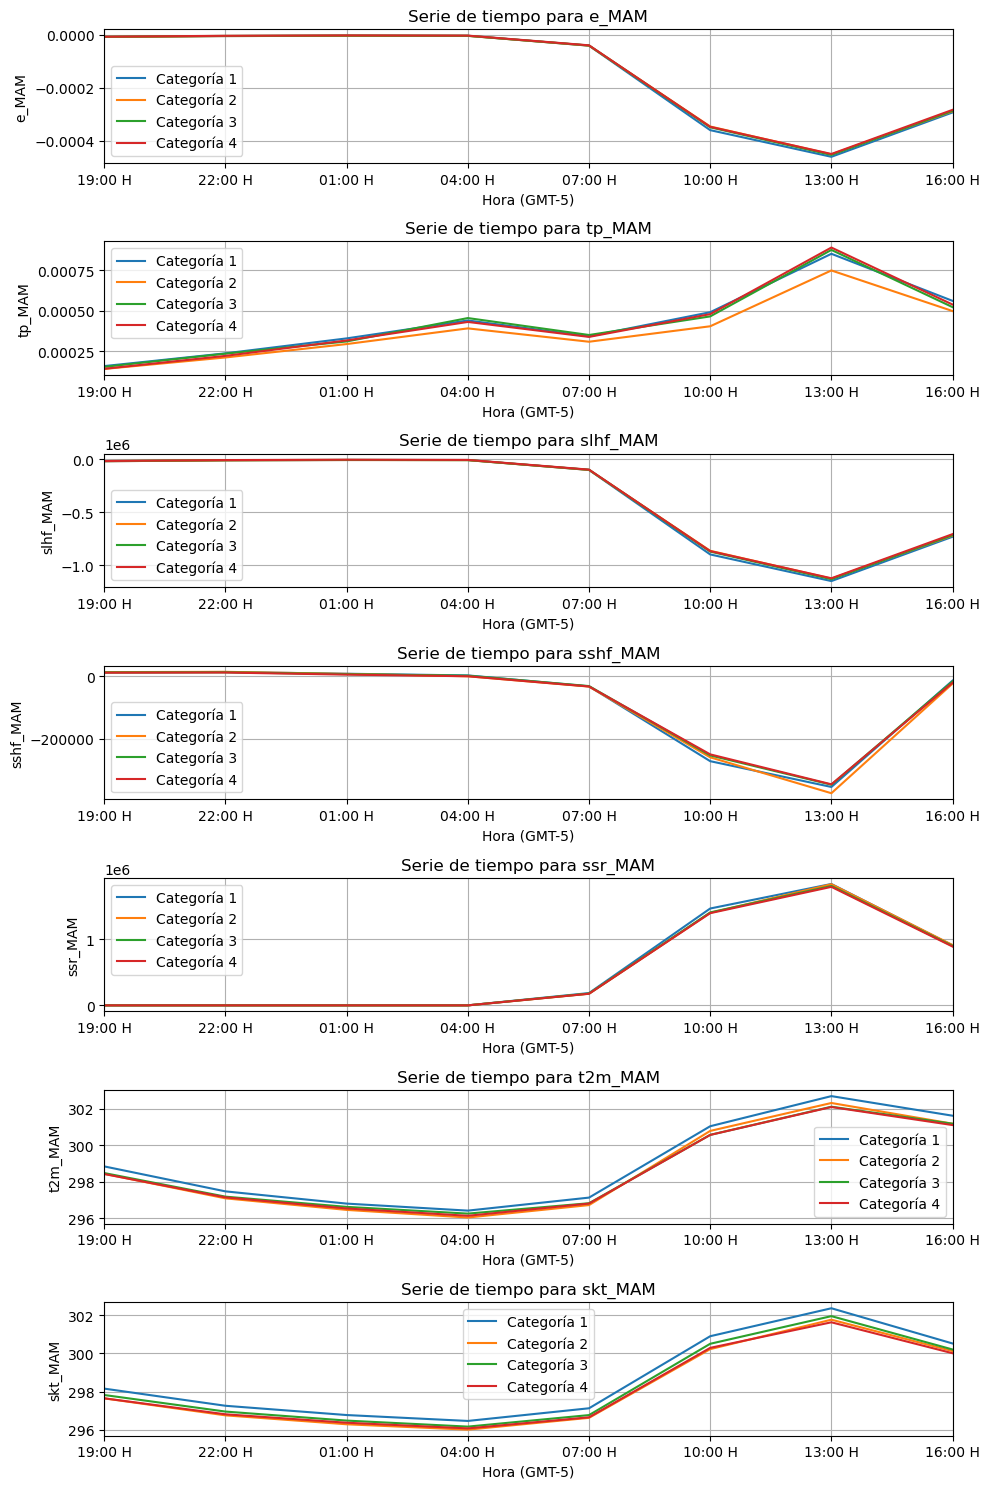

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
df = df_grouped.reset_index()

# Rellenar las categorías faltantes (NaN) usando forward fill para agrupar correctamente
df['cat'].fillna(method='ffill', inplace=True)

# Lista de variables a graficar
variables = [f'e_{nameMon}', f'tp_{nameMon}', f'slhf_{nameMon}', f'sshf_{nameMon}', f'ssr_{nameMon}', f't2m_{nameMon}', f'skt_{nameMon}']

# Definir las horas originales y sus equivalentes en GMT-5
horas_gmt = list(range(0, 24, 3))  # Cada 3 horas (0, 3, 6, ..., 21)
horas_local = [(h - 5) % 24 for h in horas_gmt]  # Ajuste GMT-5, con corrección modular

# Crear figura y subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 15))

# Graficar cada variable en un subplot
for i, var in enumerate(variables):
    
    # Graficar para cada categoría
    for cat in df['cat'].unique():
        data = df[df['cat'] == cat]
        axs[i].plot(data['hour'], data[var], label=f'Categoría {int(cat)}')
    # Configuraciones del subplot
    axs[i].set_xlim(0, 21)
    axs[i].set_xticks(horas_gmt)  # Colocar marcas cada 3 horas
    axs[i].set_xticklabels([f'{h:02d}:00 H' for h in horas_local])  # Convertir las horas a su equivalente en GMT-5
    axs[i].set_title(f'Serie de tiempo para {var}')
    axs[i].set_xlabel('Hora (GMT-5)')
    axs[i].set_ylabel(var)
    axs[i].legend()
    axs[i].grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.savefig('./FIGURAS/LOR_MAM.png')
plt.show()


######## calculos


[ 0  3  6  9 12 15 18 21]


/tmp/ipykernel_42160/479578223.py:154: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = ds_merged.groupby(['cat', 'hour']).mean()


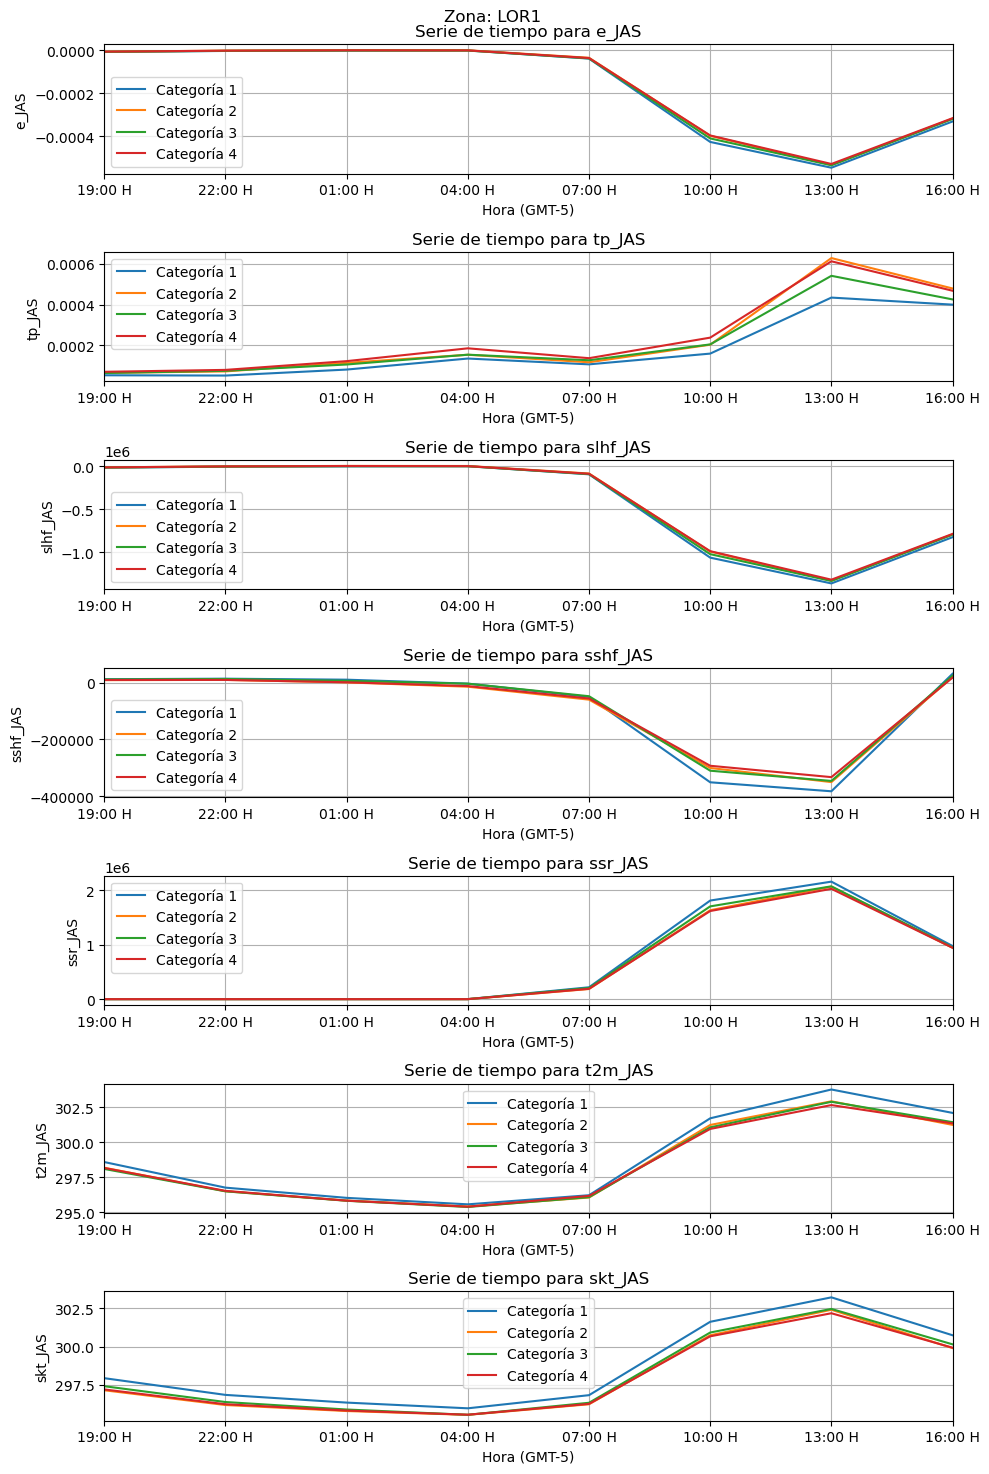

[ 0  3  6  9 12 15 18 21]


/tmp/ipykernel_42160/479578223.py:154: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = ds_merged.groupby(['cat', 'hour']).mean()


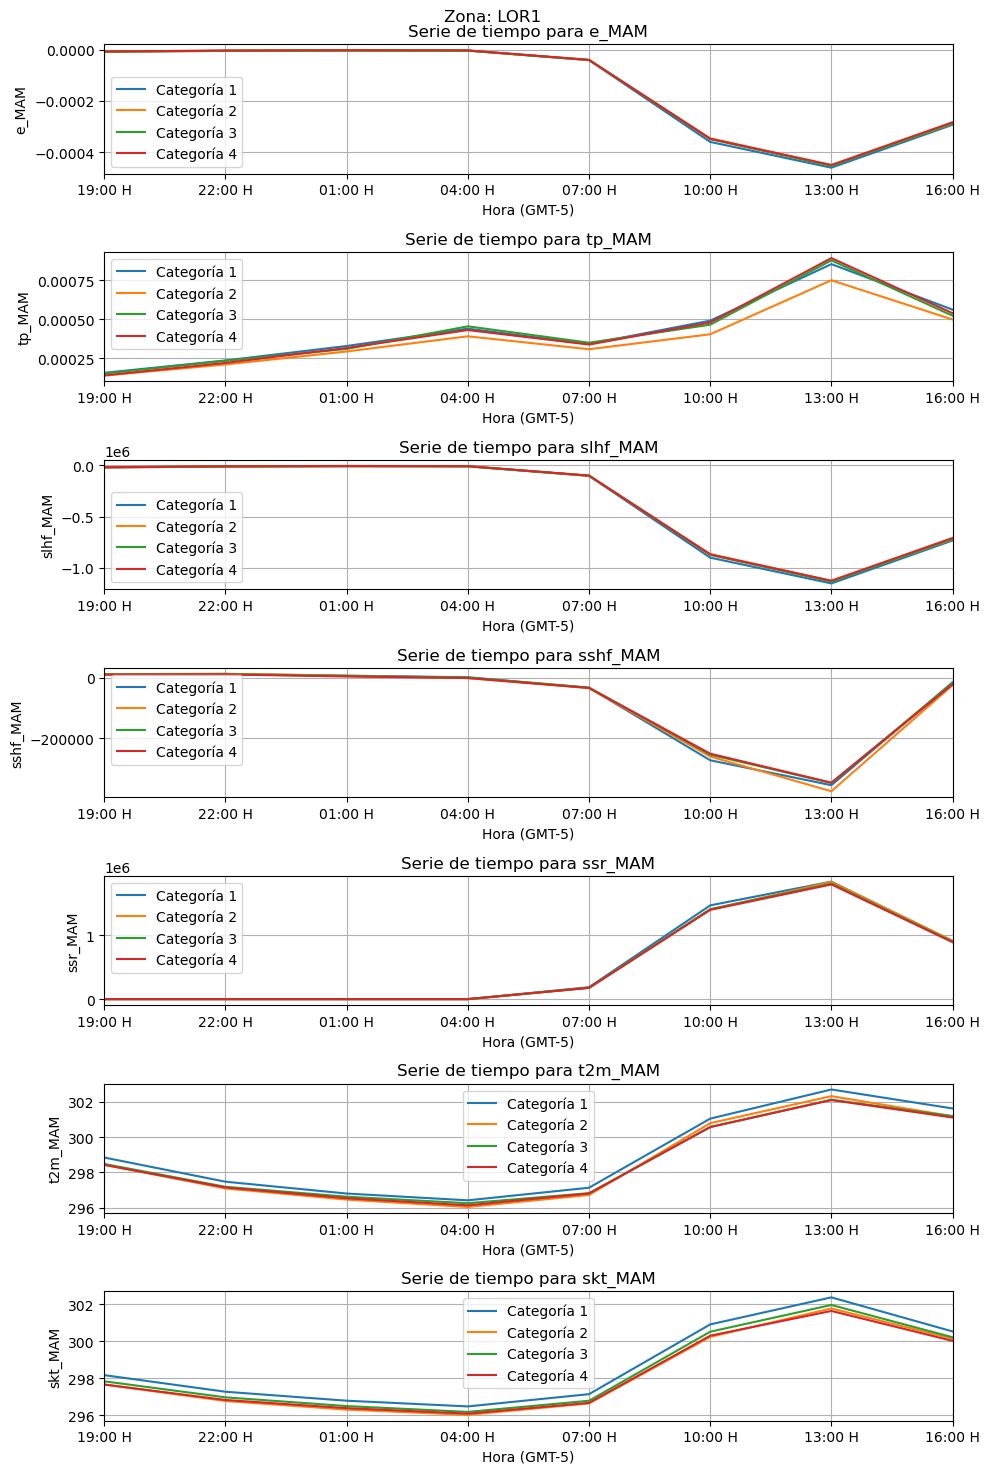

[ 0  3  6  9 12 15 18 21]


/tmp/ipykernel_42160/479578223.py:154: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = ds_merged.groupby(['cat', 'hour']).mean()


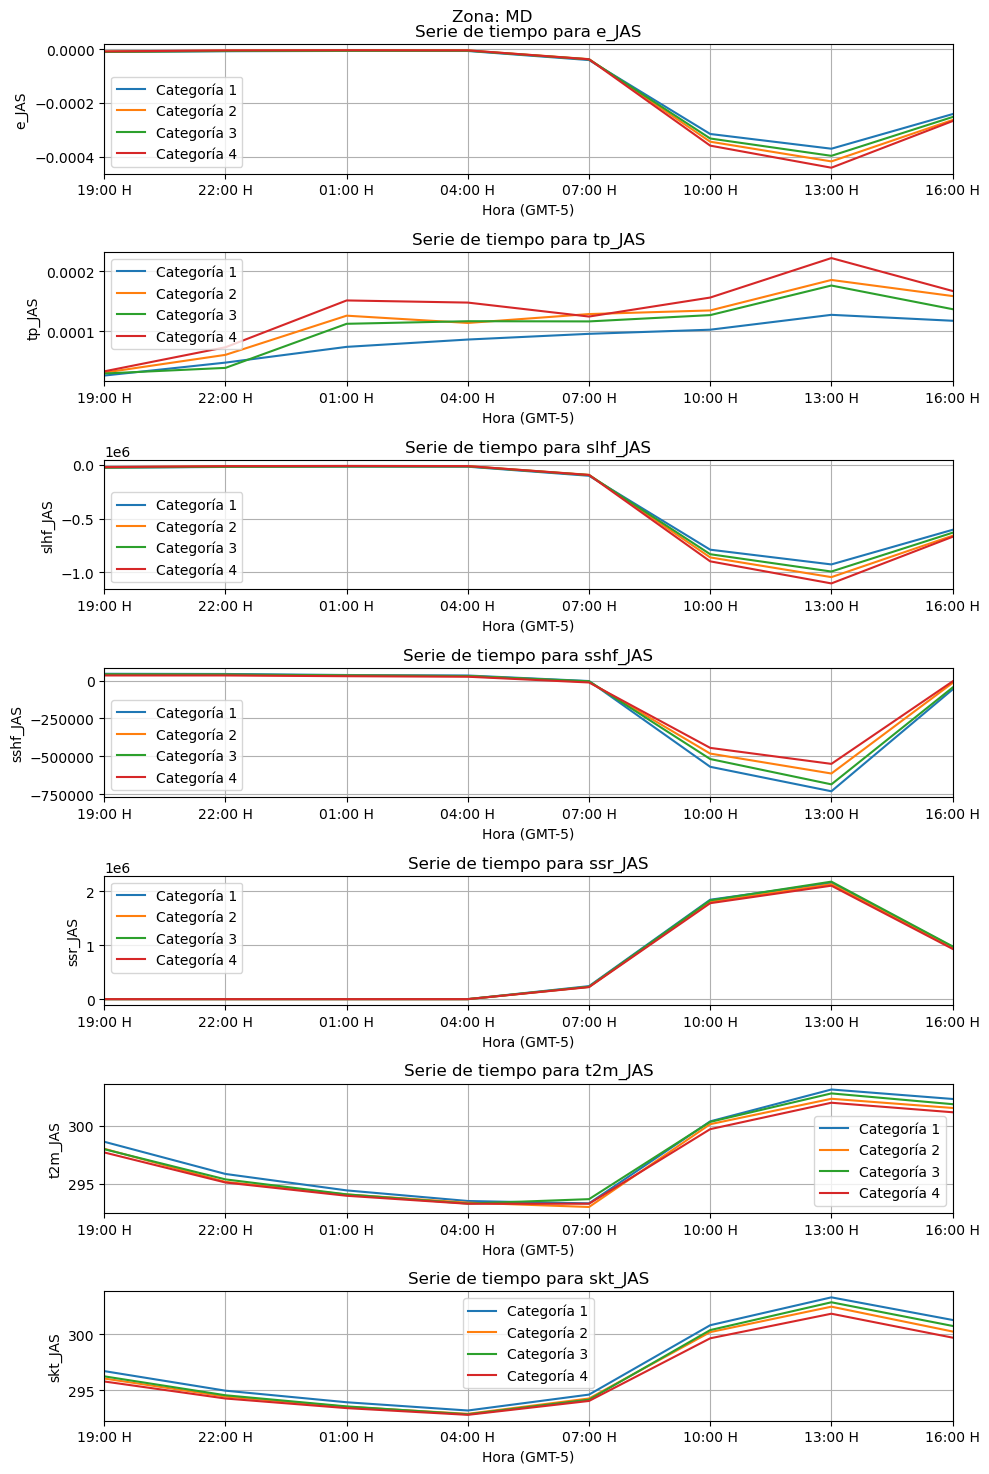

[ 0  3  6  9 12 15 18 21]


/tmp/ipykernel_42160/479578223.py:154: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = ds_merged.groupby(['cat', 'hour']).mean()


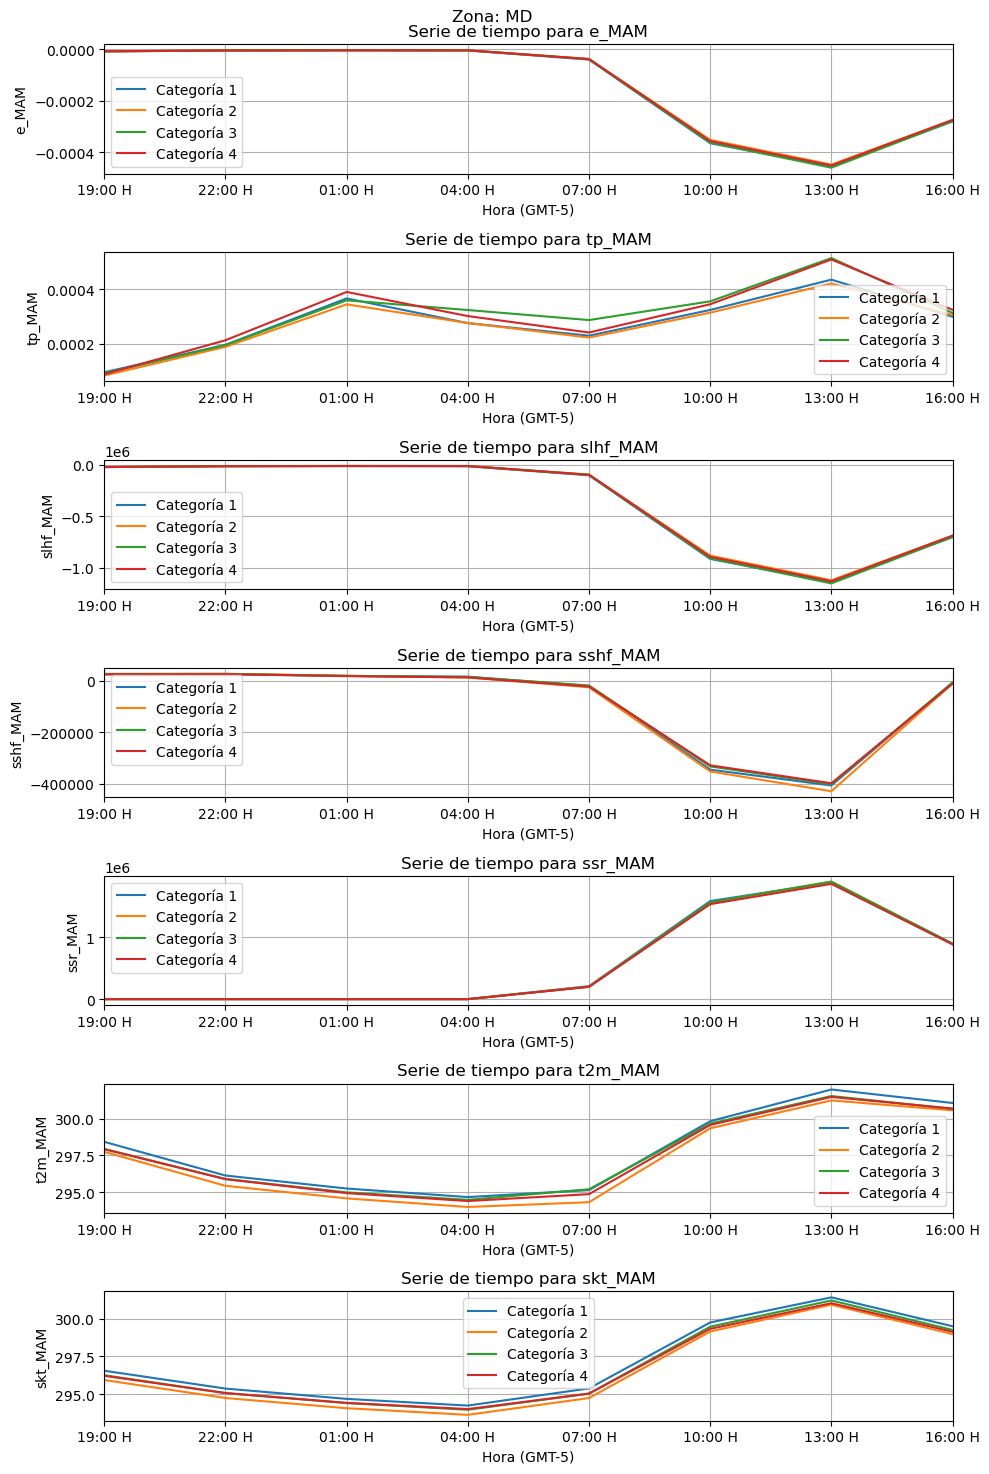

In [182]:
import xarray as xr
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
# Mostrar el DataFrame agrupado
import pandas as pd
import matplotlib.pyplot as plt




# Función para reasignar el tiempo basado en la hora del nombre del archivo



def procesa(file,meses):
    def corregir_fecha(ds, archivo):
        # Extrae la hora del nombre del archivo
        hora = os.path.basename(archivo).split('_')[3][:2]
        # Extrae el año y mes de la fecha original, pero ajusta el día a '01' y la hora a la obtenida del archivo
        nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
        ds['time'] = nuevas_fechas
        return ds
    # Directorio de origen y destino
    directorio_origen =  f'/home/mandrade/DMARTINEZ/Paper2_final/datos/{file}/'
    directorio_destino = f'/home/mandrade/DMARTINEZ/Paper2_final/datos/{file}/nuevosCalculos2/'

    # Crea el directorio destino si no existe
    os.makedirs(directorio_destino, exist_ok=True)

    # Busca todos los archivos que coincidan con el patrón ERA5_*.nc
    archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))

    # Procesa cada archivo
    for archivo in archivos:
        # Abre el dataset y corrige las fechas
        ds = corregir_fecha(xr.open_dataset(archivo), archivo)

        # Imprime los tres primeros valores del tiempo para mostrar los meses asignados
        tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
        # print(f"Archivo: {archivo}, Primeros 3 meses asignados: {tres_primeros_meses}")

        # Genera el nombre del archivo de salida
        nombre_archivo = os.path.basename(archivo)
        archivo_salida = os.path.join(directorio_destino, nombre_archivo)

        # Guarda el dataset corregido en el nuevo directorio
        ds.to_netcdf(archivo_salida)
        # print(f'Guardado: {archivo_salida}')

    # Ruta al directorio que contiene los archivos
    directorio = directorio_origen

    # Iterar sobre los archivos en el directorio
    for archivo in os.listdir(directorio):
        # Verificar si el archivo contiene 'MD' en su nombre
        if 'MD' in archivo:
            # Crear el nuevo nombre del archivo eliminando 'MD'
            nuevo_nombre = archivo.replace('MD_', '')

            # Obtener la ruta completa del archivo original y del nuevo archivo
            ruta_original = os.path.join(directorio, archivo)
            ruta_nueva = os.path.join(directorio, nuevo_nombre)

            # Renombrar el archivo
            os.rename(ruta_original, ruta_nueva)
            print(f'Archivo renombrado: {archivo} -> {nuevo_nombre}')


    ### corrige fechas
    def corregir_fecha(ds, archivo):
        hora = os.path.basename(archivo).split('_')[3][:2]
        nuevas_fechas = pd.to_datetime(ds['time'].dt.strftime(f'%Y-%m-01 {hora}:00:00'))
        ds['time'] = nuevas_fechas
        return ds

    directorio_origen = directorio
    directorio_destino = directorio+'nuevosCalculos2/'
    os.makedirs(directorio_destino, exist_ok=True)
    archivos = glob.glob(os.path.join(directorio_origen, 'ERA5_*.nc'))
    for archivo in archivos:
        ds = corregir_fecha(xr.open_dataset(archivo), archivo)
        tres_primeros_meses = [pd.to_datetime(time).strftime('%Y-%m') for time in ds['time'].values[:3]]
        nombre_archivo = os.path.basename(archivo)
        archivo_salida = os.path.join(directorio_destino, nombre_archivo)
        ds.to_netcdf(archivo_salida)


    # Definir las variables y estaciones
    var = ['e', 'tp', 'slhf', 'sshf', 'ssr', 't2m', 'skt']
    estaciones = [f'{meses}']
    nameMon=estaciones[0]
    # Función para cargar, ordenar y retornar los datos de cada variable y estación, asegurando que sean float
    def agregarVal(variable, estacion):
        path = f'{directorio_destino}/ERA5_{variable}_{estacion}_*.nc'

        # Intentar cargar los datos desde los archivos
        try:
            ds = xr.open_mfdataset(path, combine='nested', concat_dim='time')
            ds = ds.load()  # Cargar los datos en memoria
            ds = ds.sortby('time')  # Ordenar por la coordenada 'time'

            # Obtener la primera variable del dataset
            primera_variable = list(ds.data_vars)[0]

            # Convertir a float explícitamente y retornar la variable
            return ds[primera_variable].astype(float)

        except FileNotFoundError:
            print(f"Archivo no encontrado: {path}")
            return None
    ################
    # Crear un dataset vacío para almacenar todas las variables
    dsTotal = xr.Dataset()

    # Iterar sobre las estaciones y variables
    for estacion in estaciones:
        for variable in var:
            resultado = agregarVal(variable, estacion)
            if resultado is not None:
                dsTotal[f'{variable}_{estacion}'] = resultado

    # Convertir el dataset a un DataFrame, eliminando las columnas de latitud y longitud
    dsTotal_df = dsTotal.to_dataframe().reset_index().drop(columns=['lon', 'lat'])

    # Crear la nueva columna 'ANHOMES' a partir del año y mes de la columna 'time'
    dsTotal_df['ANHOMES'] = dsTotal_df['time'].dt.strftime('%Y')  # Formato YYYY-MM

    # Cargar la categorización desde el archivo Excel
    dsCat = pd.read_excel('/home/mandrade/DMARTINEZ/paper2_dataordenada/categorizacion.xlsx')

    # Crear la columna 'ANHOMES' en la categorización (asumiendo que tiene una columna 'time')
    dsCat['ANHOMES'] = pd.to_datetime(dsCat['time']).dt.strftime('%Y')  # Formato YYYY-MM

    # Hacer un merge entre el dataset y la categorización usando la columna 'ANHOMES'
    ds_merged = pd.merge(dsTotal_df, dsCat, on='ANHOMES', how='left')  # 'left' para no perder datos del dataset
    
    ds_merged.to_excel(f'./datosProcesados_0809/datos_{file}_{meses}.xlsx')
    # Mostrar el resultado
    ds_merged = ds_merged[ds_merged['cat'] > 0].drop(columns=['time_y', 'ANHOMES']).rename(columns={'time_x': 'time'})

    ds_merged = ds_merged[ds_merged['cat'].notna()]
    
    ds_merged = ds_merged.drop_duplicates()

    # Extraer la hora de la columna 'time'
    ds_merged['hour'] = ds_merged['time'].dt.hour
    print(ds_merged['hour'].unique())
    # Agrupar por 'cat' y 'hour', y calcular la media de cada grupo
    df_grouped = ds_merged.groupby(['cat', 'hour']).mean()
    # df_grouped


    # Cargar el archivo Excel
    df = df_grouped.reset_index()
    df.to_excel(f'./datosProcesados_0809/ciclo_diurno_{file}_{meses}.xlsx')
    # Rellenar las categorías faltantes (NaN) usando forward fill para agrupar correctamente
    df['cat'].fillna(method='ffill', inplace=True)

    # Lista de variables a graficar
    variables = [f'e_{nameMon}', f'tp_{nameMon}', f'slhf_{nameMon}', f'sshf_{nameMon}', f'ssr_{nameMon}', f't2m_{nameMon}', f'skt_{nameMon}']

    # Definir las horas originales y sus equivalentes en GMT-5
    horas_gmt = list(range(0, 24, 3))  # Cada 3 horas (0, 3, 6, ..., 21)
    horas_local = [(h - 5) % 24 for h in horas_gmt]  # Ajuste GMT-5, con corrección modular

    # Crear figura y subplots
    fig, axs = plt.subplots(len(variables), 1, figsize=(10, 15))

    # Graficar cada variable en un subplot
    for i, var in enumerate(variables):

        # Graficar para cada categoría
        for cat in df['cat'].unique():
            data = df[df['cat'] == cat]
            axs[i].plot(data['hour'], data[var], label=f'Categoría {int(cat)}')
        # Configuraciones del subplot
        axs[i].set_xlim(0, 21)
        axs[i].set_xticks(horas_gmt)  # Colocar marcas cada 3 horas
        axs[i].set_xticklabels([f'{h:02d}:00 H' for h in horas_local])  # Convertir las horas a su equivalente en GMT-5
        axs[i].set_title(f'Serie de tiempo para {var}')
        axs[i].set_xlabel('Hora (GMT-5)')
        axs[i].set_ylabel(var)
        axs[i].legend()
        axs[i].grid(True)

    # Ajustar el espaciado entre subplots
    plt.suptitle(f'Zona: {file} ')
    plt.tight_layout()
    plt.savefig(f'./datosProcesados_0809/{file}_{meses}.png')
    plt.show()

    
procesa('LOR1','JAS')
procesa('LOR1','MAM')
procesa('MD','JAS')
procesa('MD','MAM')